Title: 
    
Analysis of Algerian Forest Fires: An Inferential Explanation of Possible Correlation.

Introduction: 

Large sections of forest are destroyed everyday by forest fires. Not only do these types of natural disasters destroy the trees but they also exterminate and displace wildlife within the threatened ecosystem. Consequently, it would be of great beneficence to be able to pinpoint major factors(atmospheric conditions) contributing to these phenomena(forest fires) and allow for possible combatant scaffolding to be deduced.  The following research will examine a dataset (“Algerian_forest_fires_dataset_UPDATE.csv”) that contains a total of 244 instances of forest fires in two regions of Algeria(Bejaia region and Sidi Bel-abbes region) that were gathered between June and September of 2012. Since the most predominant cause of forest fires is lightning on dry trees and soil in low moisture conditions. To begin we will compare the "RH" column to “Temperature” column. We will analyze each variable to see if there is a correlation between that variable and the possible outcome of fire with respect to RH. 

Preliminary exploratory data analysis:

In [56]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library("readxl")
library(tidymodels)
library(lubridate)
library(ggplot2)
library(forcats)

The dataset can be read into R using the following read_csv function:Forest_fire <- read.csv("Project/Algerian_forest_fires_dataset_UPDATE.csv", skip=1), however, the dataset is actually consisting of 2 tables and we decided to separate it into two csv files. Hence we would use Bejaia <- read.csv("Bejaia.csv", skip=1), and Sidi_Bel_Abbes <- read_csv("Sidi_Bel_Abbes.csv", skip=1).

In [57]:
id_Bej <- "1zby9kC_wgi3bpMBtvgZACrDTMxZY3MXa" # google file ID
Bejaia <- read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_Bej),skip = 1)
#head(Bejaia)

id_SBA <-"1H8TMtO7zSFH80RUYPZbzqEbm207hqe72"
Sidi_Bel_Abbes<-read_csv(sprintf("https://docs.google.com/uc?id=%s&export=download", id_SBA),skip = 1)
#head(Sidi_Bel_Abbes)

Bejaia%>%
   mutate(Class=as_factor(Classes)) %>%
    pull(Class)%>% 
    levels()

Sidi_Bel_Abbes%>%
   mutate(Classes=as_factor(Classes)) %>%
    pull(Classes)%>% 
    levels()

head(Bejaia)
head(Sidi_Bel_Abbes)


Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_double(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_double(),
  Classes = col_character()
)

Parsed with column specification:
cols(
  day = col_double(),
  month = col_double(),
  year = col_double(),
  Temperature = col_double(),
  RH = col_double(),
  Ws = col_double(),
  Rain = col_double(),
  FFMC = col_double(),
  DMC = col_double(),
  DC = col_character(),
  ISI = col_double(),
  BUI = col_double(),
  FWI = col_character(),
  Classes = col_character()
)



[1] "not fire" "fire"

[1] "not fire" "fire"

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1,not fire
5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [58]:
set.seed(1)

In [59]:
bejaia<- Bejaia %>%       
    mutate(Class=as_factor(Classes)) %>%
    select(-Classes)   

In [60]:
num_obs_bejaia <- nrow(bejaia)
bejaia_class_counts <- bejaia %>%
      group_by(Class) %>%
      summarize(
      n = n(),
      percentage = n() / num_obs_bejaia * 100
  )
bejaia_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Class,n,percentage
<fct>,<int>,<dbl>
not fire,63,51.63934
fire,59,48.36066


In [61]:
Sidi_Bel_Abbes <- Sidi_Bel_Abbes %>% 
    filter(Classes != "NA") %>% 
    mutate(Classes= as_factor(Classes))%>%
    mutate(FWI=as.numeric(FWI)) %>%
    mutate(DC=as.numeric(DC))



In [62]:
num_obs_sidi <- nrow(Sidi_Bel_Abbes)
sidi_bel_abbes_class_counts <- Sidi_Bel_Abbes %>%
      group_by(Classes) %>%
      summarize(
      n = n(),
      percentage = n() / num_obs_sidi * 100
  )
sidi_bel_abbes_class_counts

`summarise()` ungrouping output (override with `.groups` argument)



Classes,n,percentage
<fct>,<int>,<dbl>
not fire,43,35.53719
fire,78,64.46281


We decide to split the dataset into one training set and one testing set, with a 3:1 proportion.

In [63]:
Sidi_Bel_Abbes_split<- initial_split(Sidi_Bel_Abbes, prop = 0.75, strata = Classes)  
Sidi_Bel_Abbes_train <- training(Sidi_Bel_Abbes_split)   
Sidi_Bel_Abbes_test <- testing(Sidi_Bel_Abbes_split)
head(Sidi_Bel_Abbes_train) 
    
head(Sidi_Bel_Abbes_test)

Bejaia_split<- initial_split(bejaia, prop = 0.75, strata = Class)  
Bejaia_train <- training(Bejaia_split)   
Bejaia_test <- testing(Bejaia_split)
head(Bejaia_train)
head(Bejaia_test)

day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire
3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire
4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0,not fire
5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9,not fire
7,6,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6.0,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
6,6,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
8,6,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire
15,6,2012,28,90,15,0.0,66.8,7.2,14.7,1.2,7.1,0.6,not fire
24,6,2012,35,68,16,0.0,85.3,10.0,17.0,4.9,9.9,5.3,fire
3,7,2012,34,56,17,0.1,84.7,9.7,27.3,4.7,10.3,5.2,fire
4,7,2012,34,58,18,0.0,88.0,13.6,36.8,8.0,14.1,9.9,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,fire
8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,fire


day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,fire
9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
19,6,2012,31,55,16,0.1,79.9,4.5,16.0,2.5,5.3,1.4,not fire
21,6,2012,30,78,14,0.0,81.0,6.3,31.6,2.6,8.4,2.2,fire
1,7,2012,29,68,19,1.0,59.9,2.5,8.6,1.1,2.9,0.4,not fire


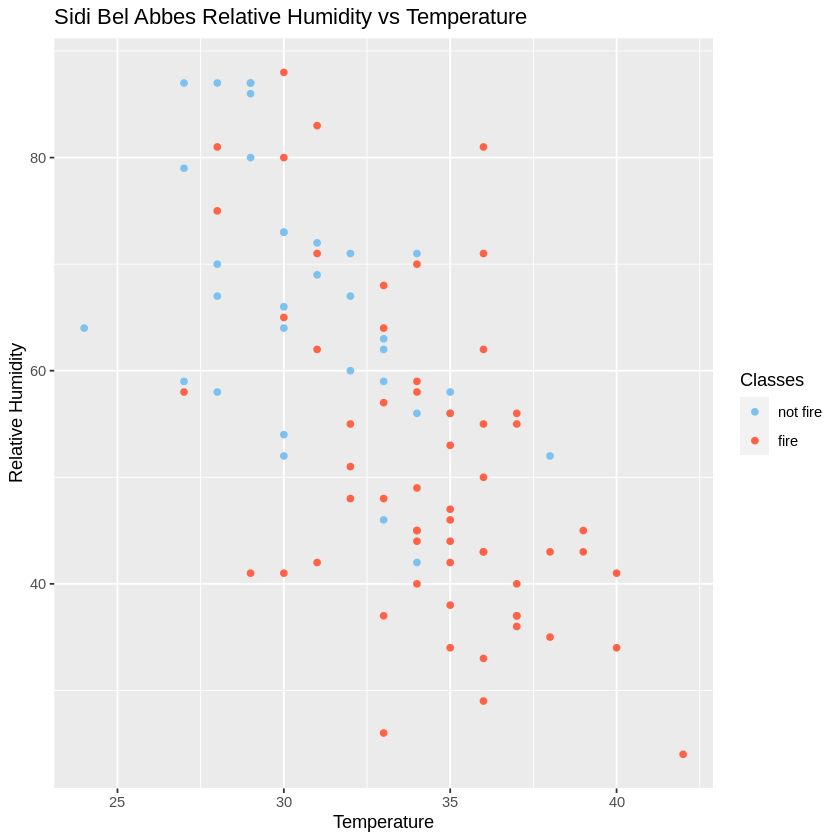

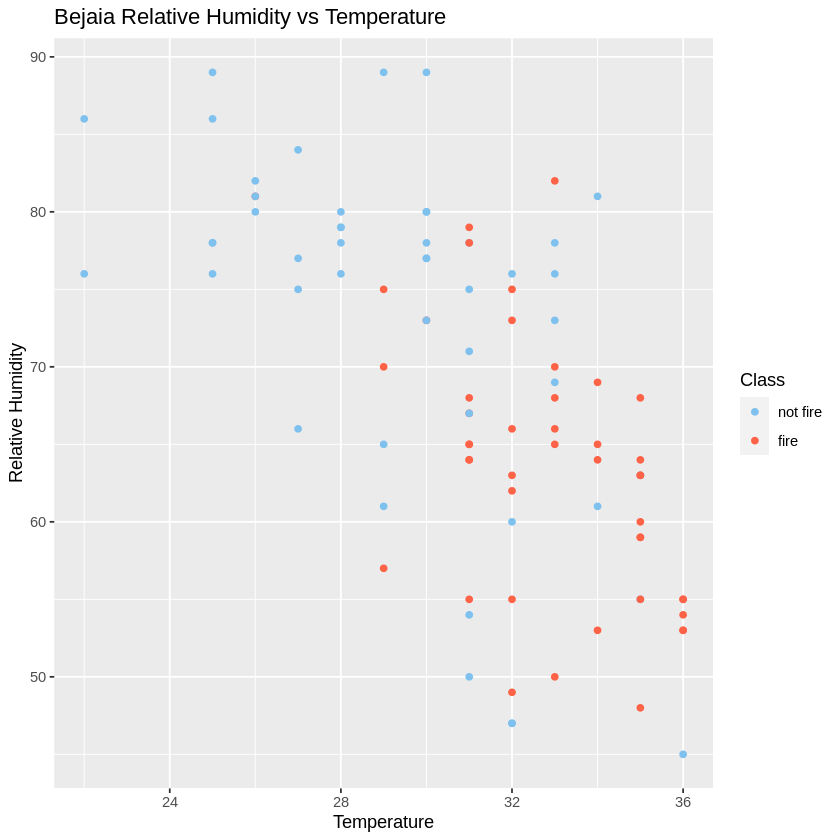

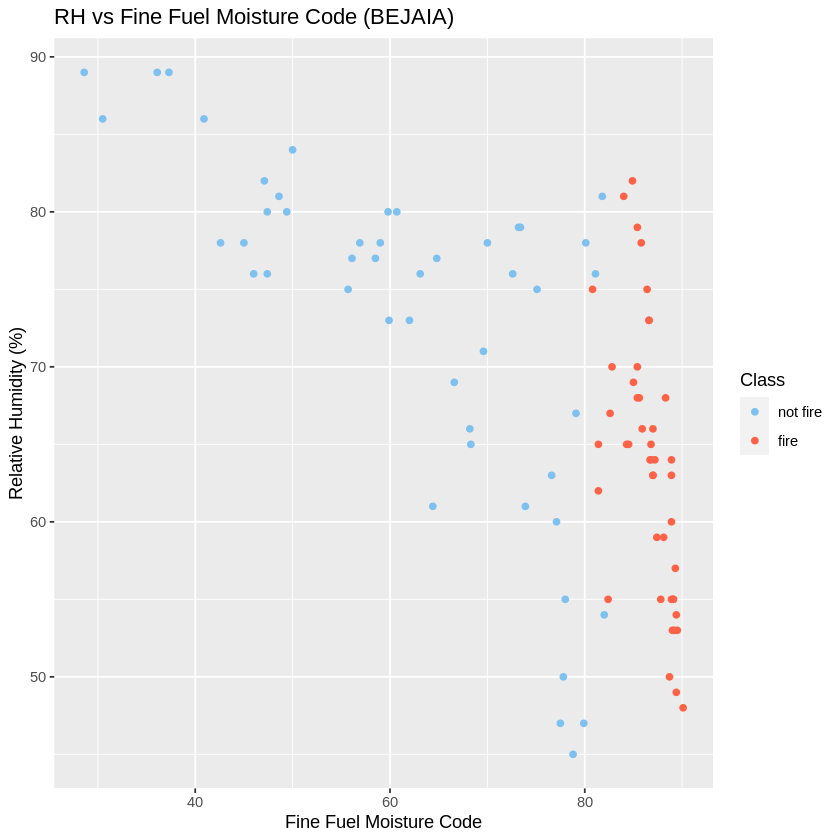

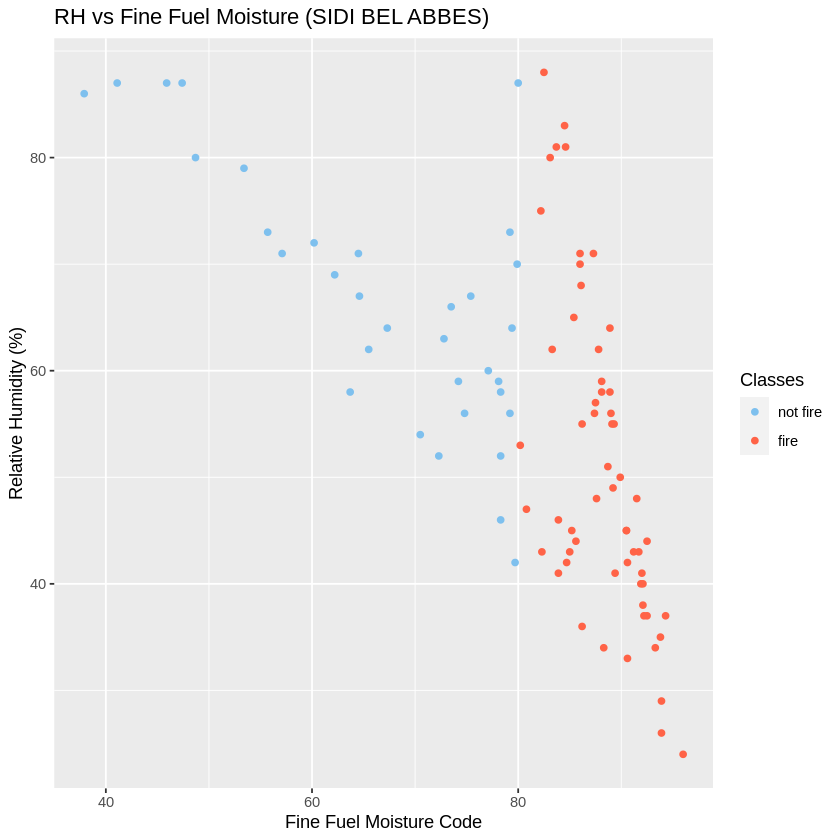

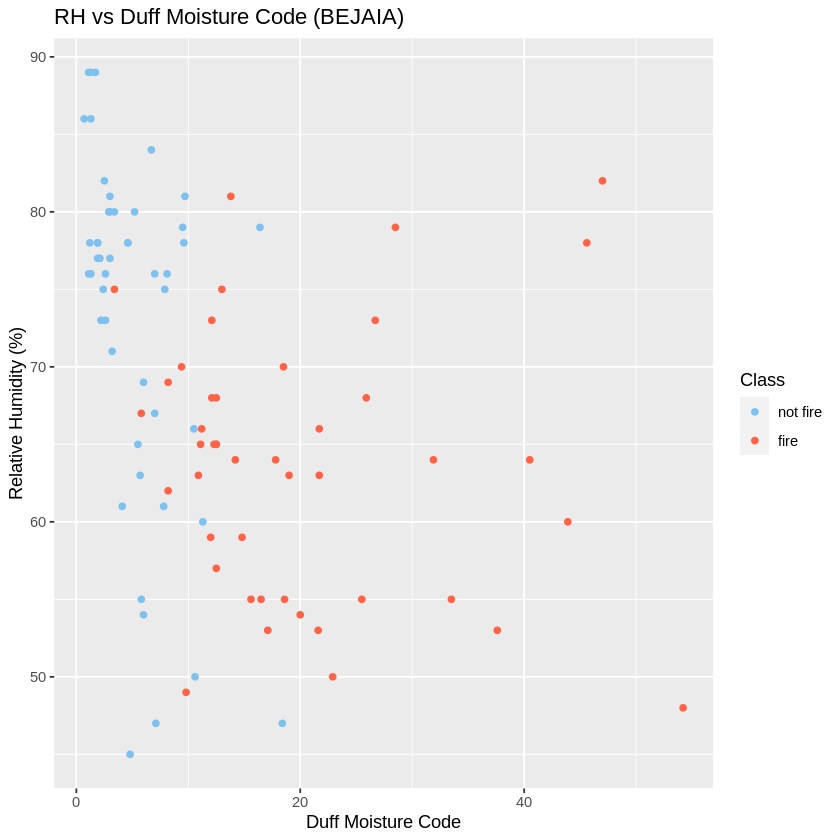

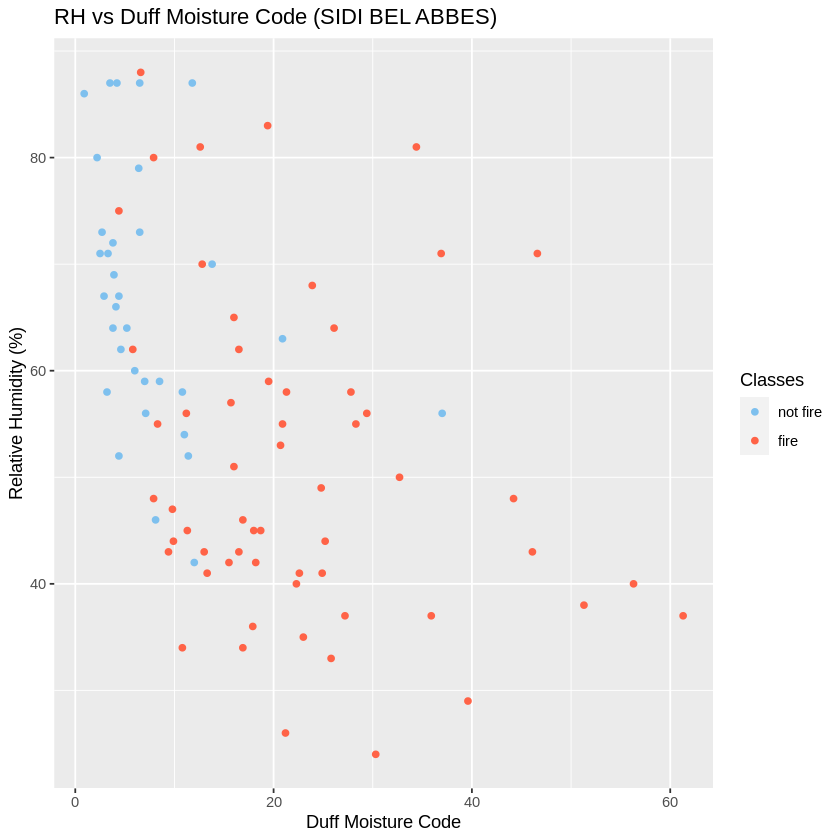

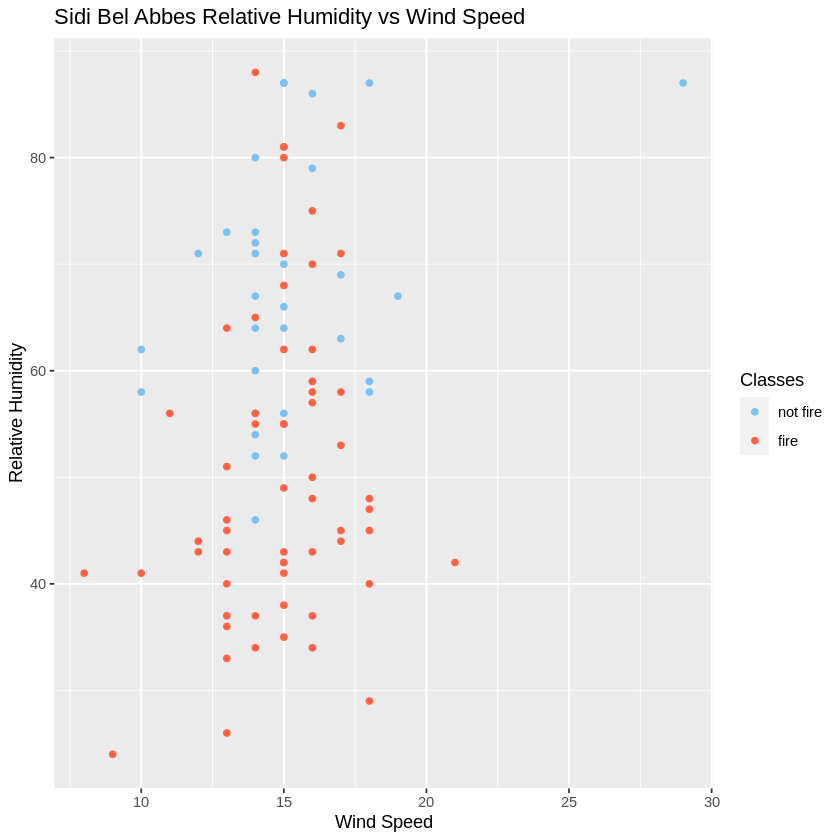

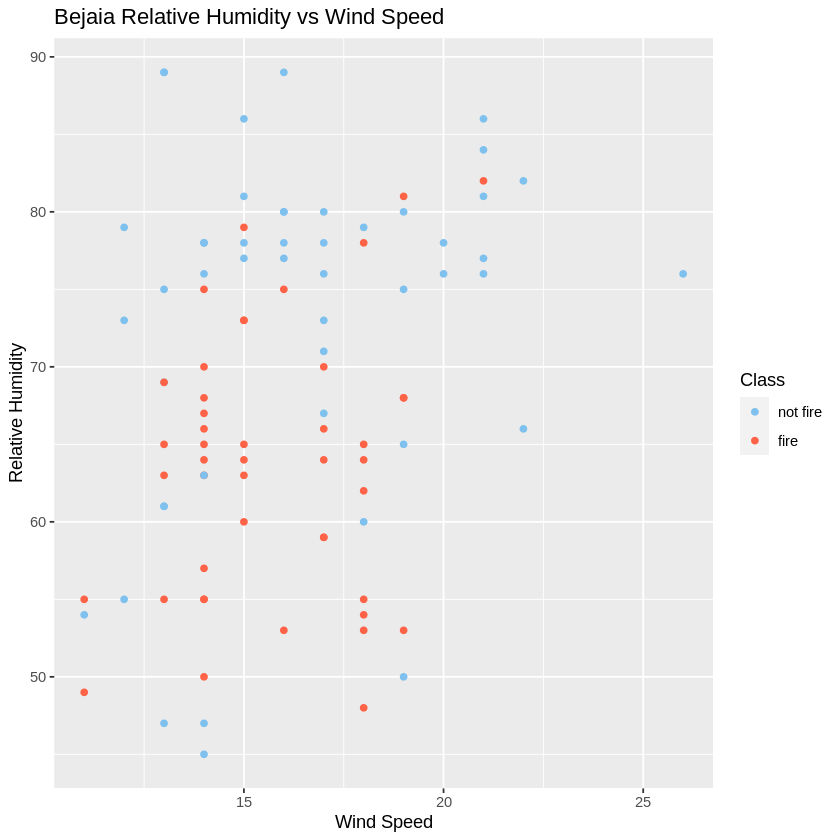

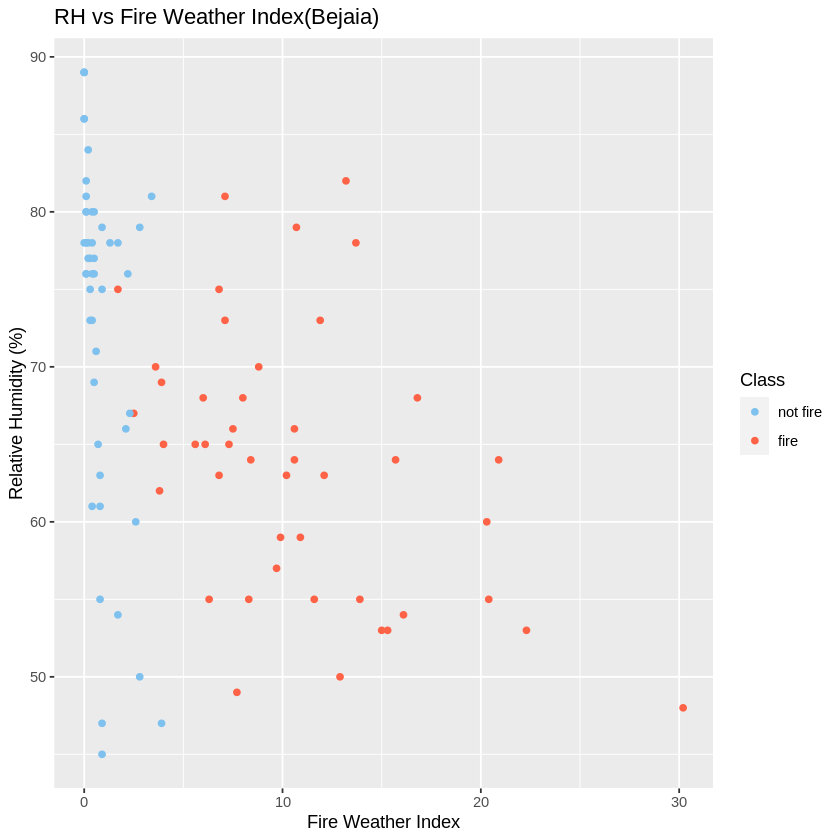

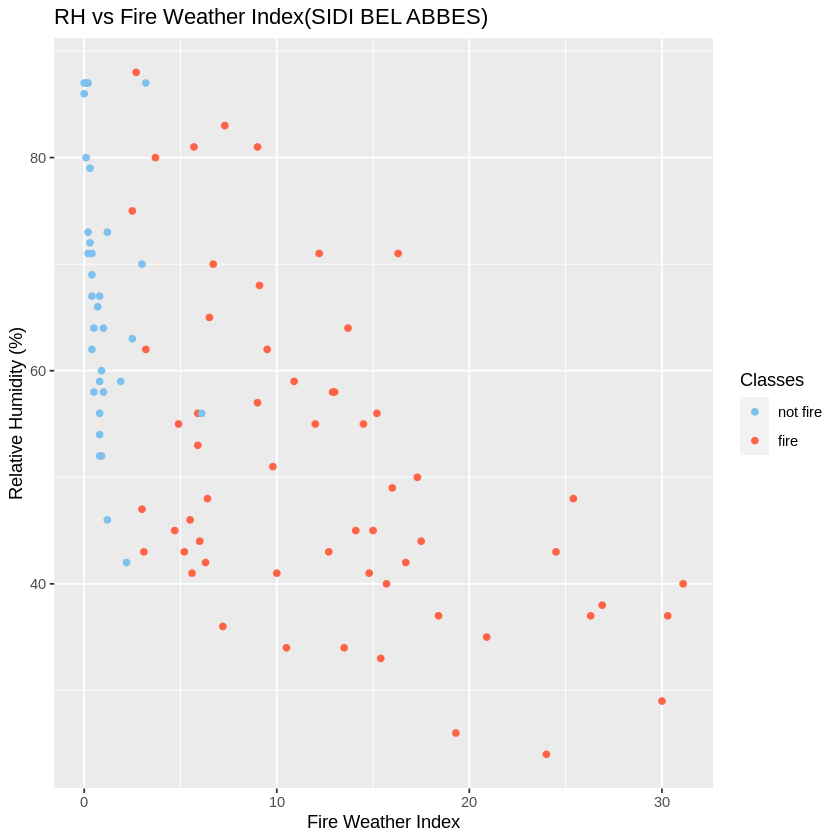

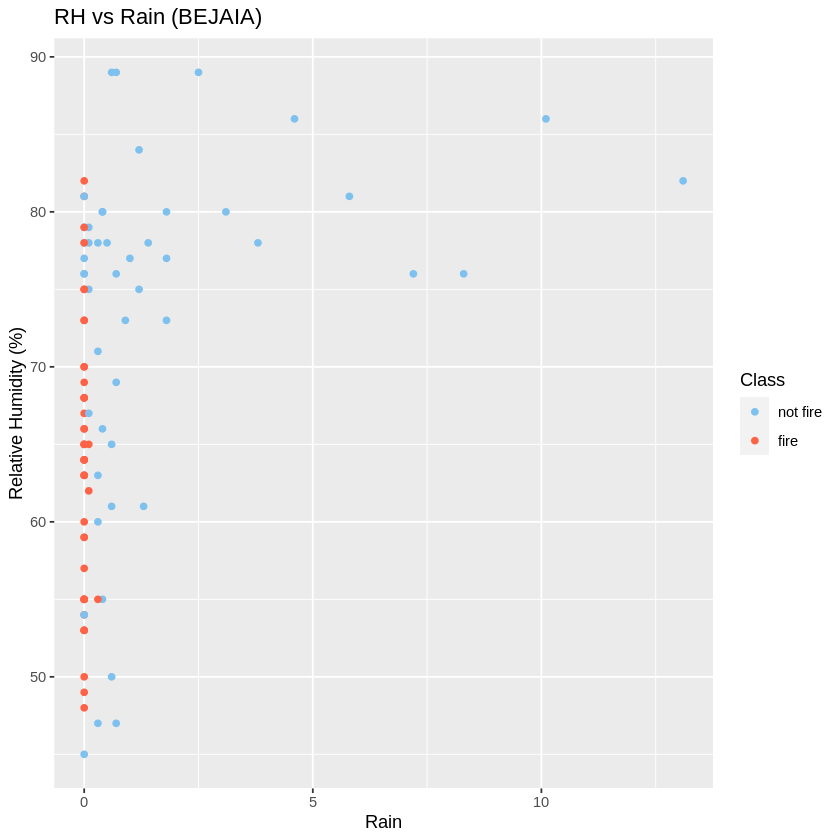

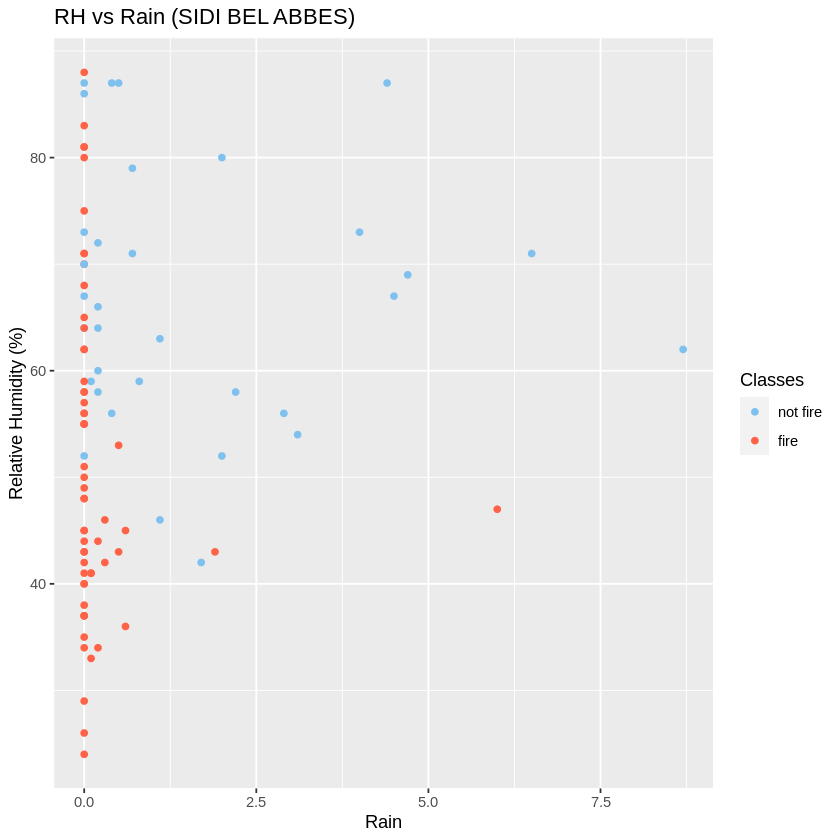

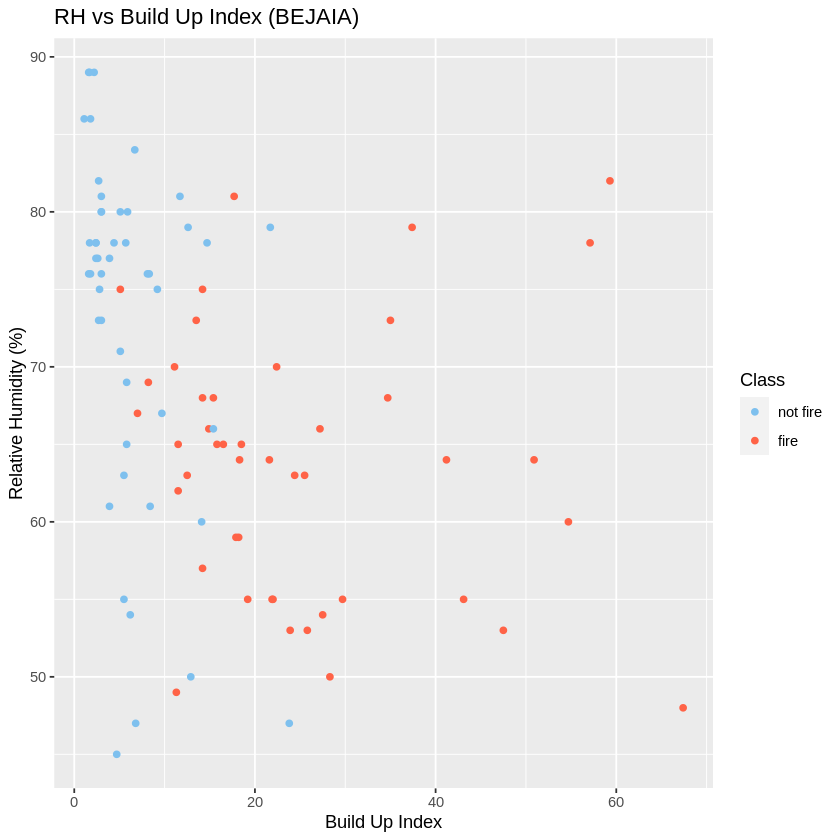

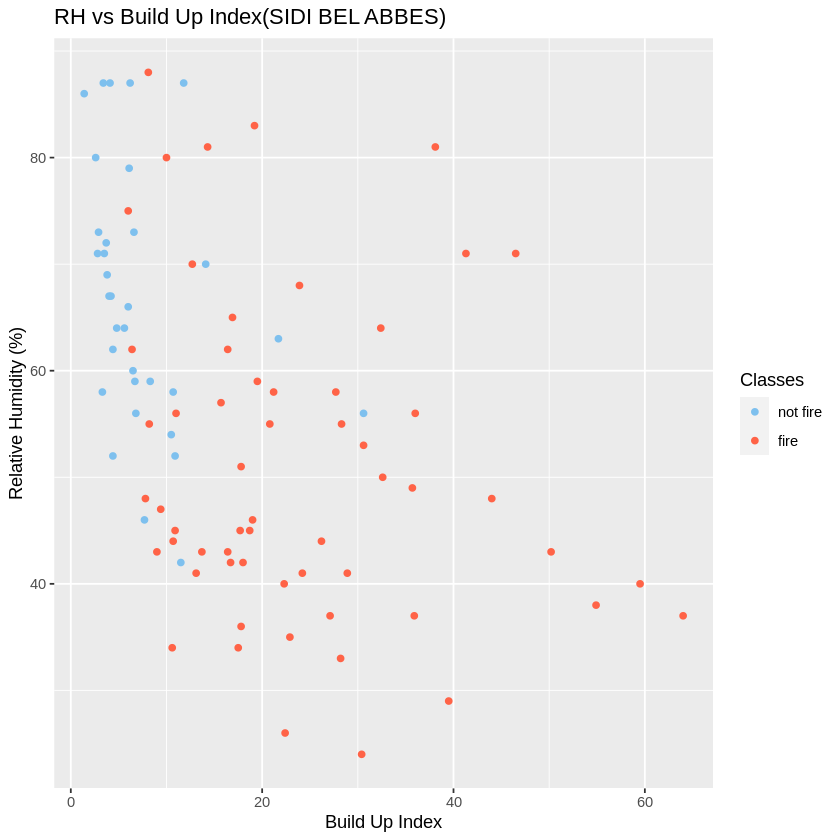

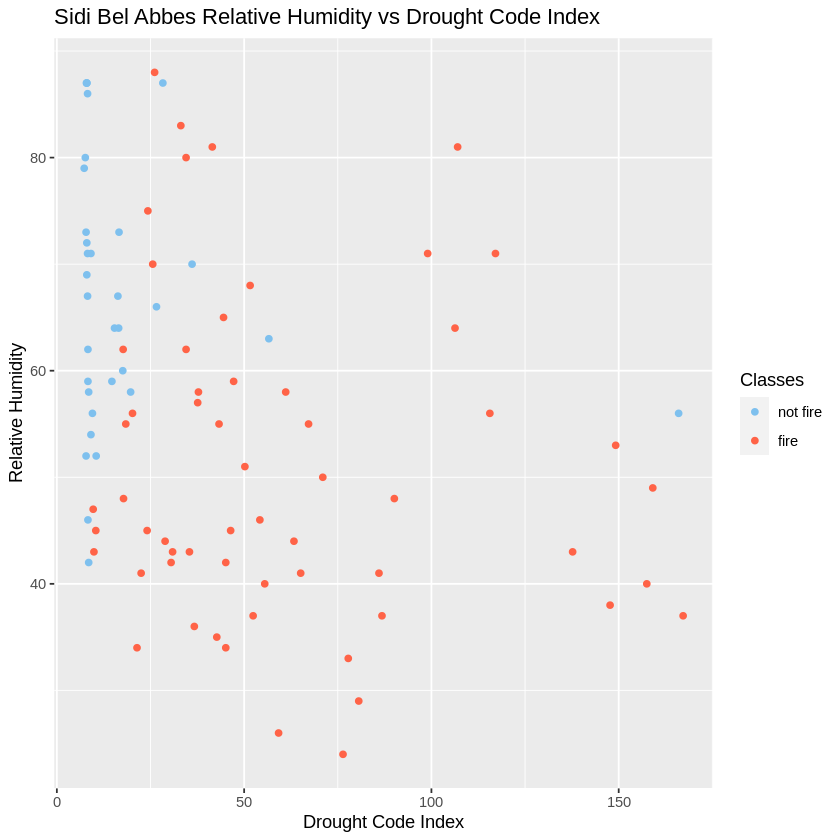

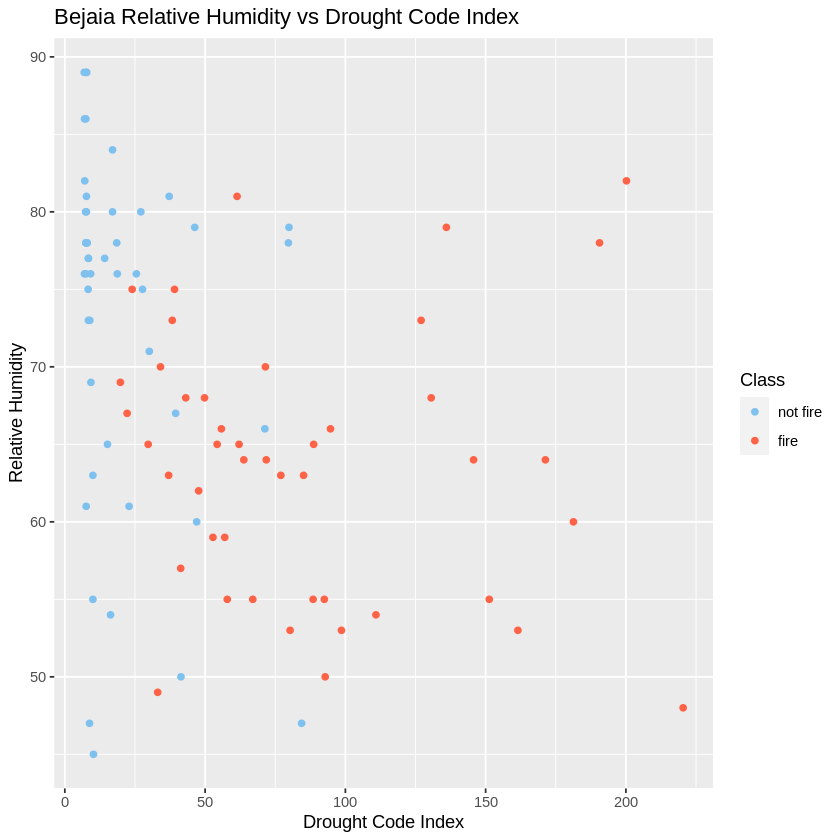

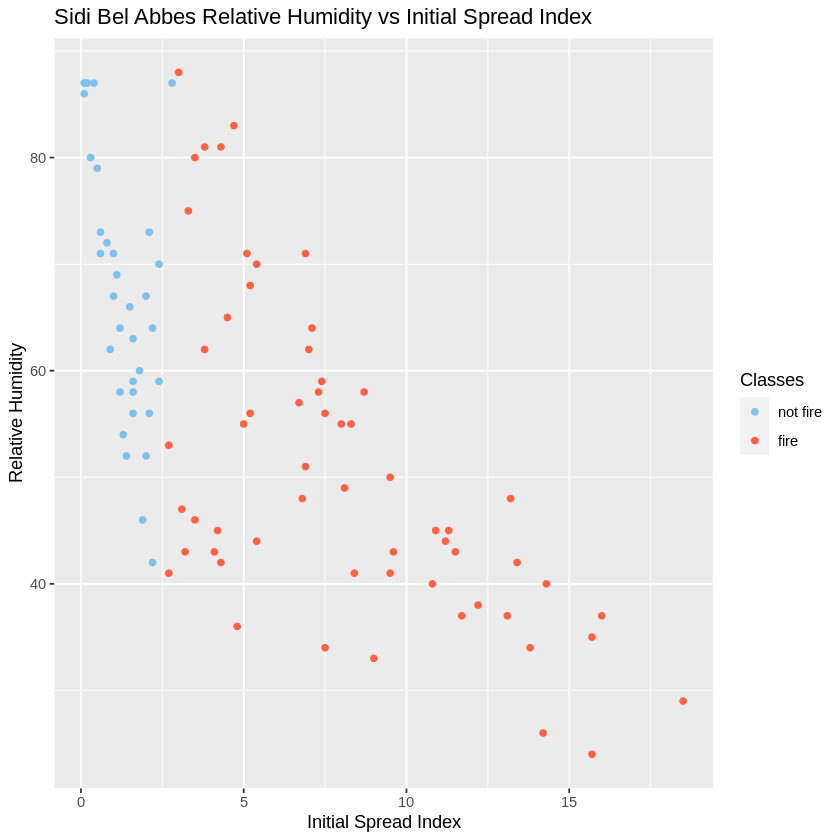

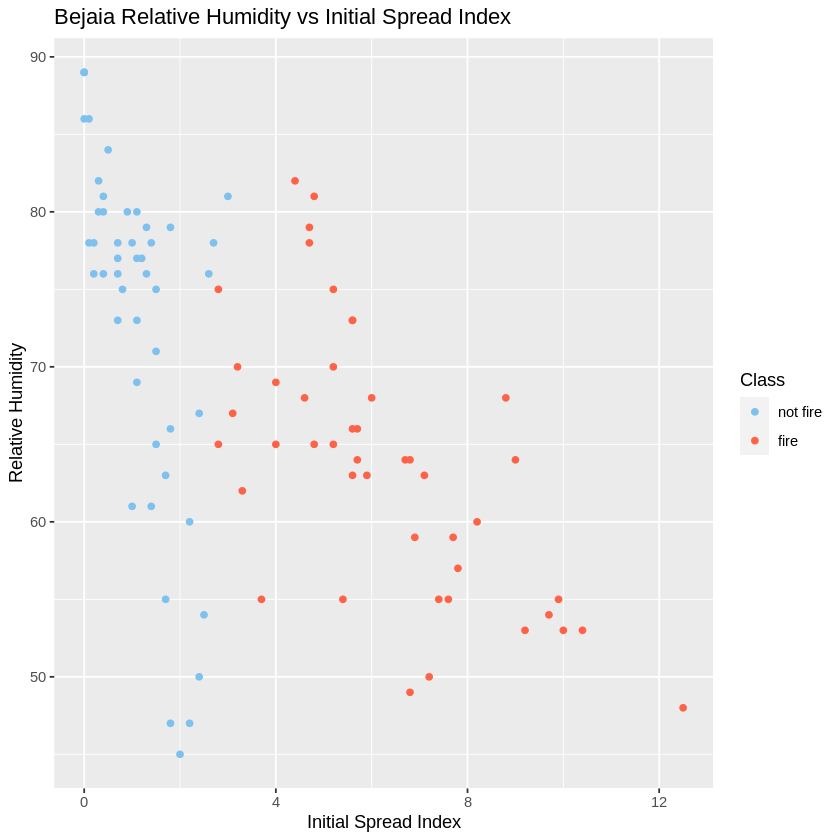

In [64]:
Sidi_Bel_Abbes_Tem <- Sidi_Bel_Abbes_train %>% 
    select(Temperature, RH, Classes) %>%
ggplot(aes(x=Temperature, y= RH, color = Classes))+
geom_point()+
xlab("Temperature")+
ylab("Relative Humidity")+
labs(title="Sidi Bel Abbes Relative Humidity vs Temperature") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Sidi_Bel_Abbes_Tem

Bejaia_Tem <- Bejaia_train %>% 
    select(Temperature, RH, Class)%>%
    ggplot(aes(x=Temperature, y= RH, color = Class))+
    geom_point()+
    xlab("Temperature")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Temperature") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))
Bejaia_Tem

Bejaia_RH_FFMC <- Bejaia_train %>%
    select(RH, Class, FFMC) %>%
    ggplot(aes(x=FFMC,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code",title="RH vs Fine Fuel Moisture Code (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Bejaia_RH_FFMC

Sidi_Bel_Abbes_RH_FFMC <- Sidi_Bel_Abbes_train %>% 
    select(RH,FFMC,Classes) %>%
    ggplot(aes(x=FFMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fine Fuel Moisture Code", title="RH vs Fine Fuel Moisture (SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Sidi_Bel_Abbes_RH_FFMC


Bejaia_RH_DMC <- Bejaia_train %>%
    select(RH, Class, DMC) %>%   
    ggplot(aes(x=DMC,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Duff Moisture Code",title="RH vs Duff Moisture Code (BEJAIA)")+
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Bejaia_RH_DMC

Sidi_Bel_Abbes_RH_DMC <- Sidi_Bel_Abbes_train%>% 
    select(RH,DMC,Classes) %>%
    ggplot(aes(x=DMC,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Duff Moisture Code",title="RH vs Duff Moisture Code (SIDI BEL ABBES)") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Sidi_Bel_Abbes_RH_DMC


Sidi_Bel_Abbes_Ws <- Sidi_Bel_Abbes_train %>% 
select(Ws, RH, Classes)%>%

ggplot(aes(x=Ws, y= RH, color = Classes))+
geom_point()+
xlab("Wind Speed")+
ylab("Relative Humidity")+
labs(title="Sidi Bel Abbes Relative Humidity vs Wind Speed") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Sidi_Bel_Abbes_Ws

Bejaia_Ws <- Bejaia_train %>% 
    select(Ws, RH, Class)%>%
    ggplot(aes(x=Ws, y= RH, color = Class))+
    geom_point()+
    xlab("Wind Speed")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Wind Speed") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))
Bejaia_Ws

Bejaia_RH_FWI <- Bejaia_train %>%
    select(FWI, Class, RH) %>%
    ggplot(aes(x=FWI,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fire Weather Index",title="RH vs Fire Weather Index(Bejaia)") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Bejaia_RH_FWI

Sidi_Bel_Abbes_RH_FWI <- Sidi_Bel_Abbes_train%>% 
    select(RH,FWI,Classes) %>%
    
    ggplot(aes(x=FWI,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Fire Weather Index", title="RH vs Fire Weather Index(SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2")) 
    
Sidi_Bel_Abbes_RH_FWI

Bejaia_RH_Rain <- Bejaia_train %>%
    select(RH, Class, Rain) %>%
    ggplot(aes(x=Rain,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Rain",title="RH vs Rain (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Bejaia_RH_Rain

Sidi_Bel_Abbes_RH_Rain <- Sidi_Bel_Abbes_train%>% 
    select(RH,Rain,Classes) %>%
    ggplot(aes(x=Rain,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Rain", title="RH vs Rain (SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))

Sidi_Bel_Abbes_RH_Rain

Bejaia_RH_BUI <- Bejaia_train %>%
    select(RH, Class, BUI) %>%
    ggplot(aes(x=BUI,y=RH,color=Class)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Build Up Index",title="RH vs Build Up Index (BEJAIA)") +
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))


Bejaia_RH_BUI

Sidi_Bel_Abbes_RH_BUI <- Sidi_Bel_Abbes_train%>% 
    select(RH,BUI,Classes) %>%
    ggplot(aes(x=BUI,y=RH,color=Classes)) +
    geom_point() + 
    labs(y="Relative Humidity (%)", x="Build Up Index", title="RH vs Build Up Index(SIDI BEL ABBES)")+
    scale_color_manual (values=c("fire"="tomato",
                                "not fire"="skyblue2"))
Sidi_Bel_Abbes_RH_BUI


Sidi_Bel_Abbes_DC <- Sidi_Bel_Abbes_train %>% 
    select(DC, RH, Classes)%>%
    filter(Classes != "NA") %>%
    ggplot(aes(x=DC, y= RH, color = Classes))+
    geom_point()+
    xlab("Drought Code Index")+
    ylab("Relative Humidity")+
    labs(title="Sidi Bel Abbes Relative Humidity vs Drought Code Index") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Sidi_Bel_Abbes_DC



Bejaia_DC <- Bejaia_train %>% 
    select(DC, RH, Class)%>%
    filter(Class != "NA") %>%
    filter(Class != '') %>%
    ggplot(aes(x=DC, y= RH, color = Class))+
    geom_point()+
    xlab("Drought Code Index")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Drought Code Index") +
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_DC

Sidi_Bel_Abbes_ISI <- Sidi_Bel_Abbes_train %>% 
    select(ISI, RH, Classes)%>%
    ggplot(aes(x=ISI, y= RH, color = Classes))+
    geom_point()+
    xlab("Initial Spread Index")+
    ylab("Relative Humidity")+
    labs(title="Sidi Bel Abbes Relative Humidity vs Initial Spread Index")+
    scale_color_manual (values=c("fire"="tomato","not fire"="skyblue2"))

Sidi_Bel_Abbes_ISI



Bejaia_ISI <- Bejaia_train %>% 
    select(ISI, RH, Class)%>%
    ggplot(aes(x=ISI, y= RH, color = Class))+
    geom_point()+
    xlab("Initial Spread Index")+
    ylab("Relative Humidity")+
    labs(title="Bejaia Relative Humidity vs Initial Spread Index")+
    scale_color_manual (values=c("fire"="tomato", "not fire"="skyblue2"))

Bejaia_ISI

The cell below contains the recipe and model for FFMC. It also contains the folded Bejaia data set. Contains the knn model specification needed to find the optimal K value. Contains a a tibble with possible k values to test

In [65]:
Bej_FFMC_recipe_scaled <- recipe(Class ~ FFMC + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

In [66]:
set.seed(1)
Bej_vfold_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

The cell below finds the optimal K value

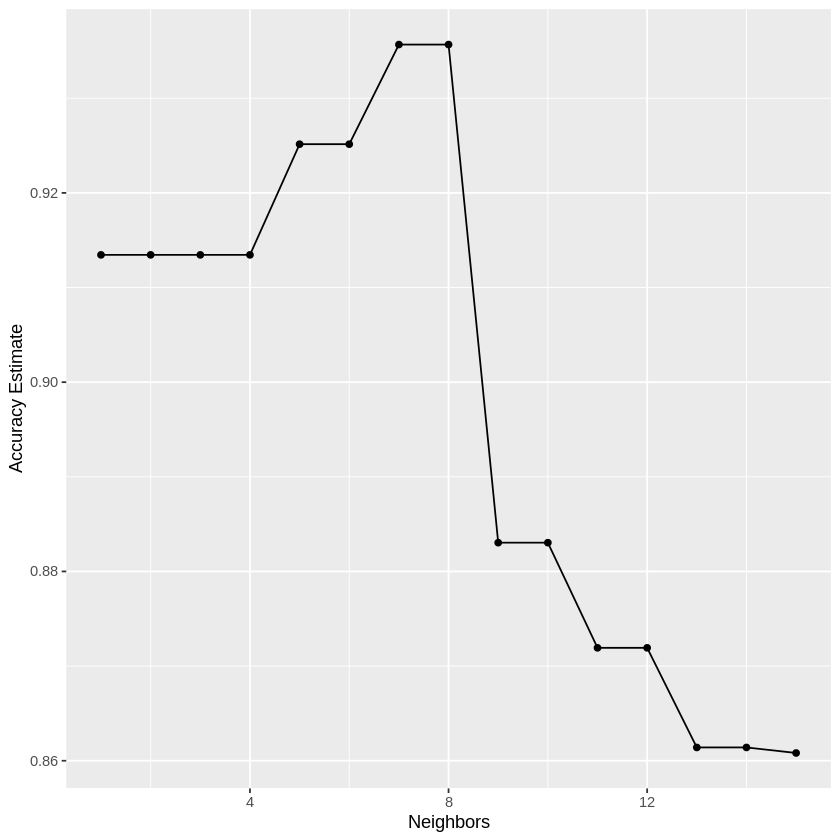

In [67]:

knn_results_tune_Bej_FFMC <- workflow() %>%
  add_recipe(Bej_FFMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_FFMC <- knn_results_tune_Bej_FFMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Bej_FFMC <- ggplot(accuracies_bej_FFMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_Bej_FFMC



In [68]:
Bej_knn_spec_FFMC <- nearest_neighbor(weight_func="rectangular", neighbors=7) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_FFMC_Fit_C <- workflow() %>%
    add_recipe(Bej_FFMC_recipe_scaled) %>%
    add_model(Bej_knn_spec_FFMC) %>%
    fit(data=Bejaia_train)


Bej_FFMC_prediction <- predict(Bej_FFMC_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_FFMC_prediction_accuracy <- Bej_FFMC_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_FFMC_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9310345
kap,binary,0.8625592


The cell below contains the recipe for FFMC for the Sidi Bel Abbes data set. It also contains the folded Sidi_Bel_Abbes data set

In [97]:
Sidi_FFMC_recipe_scaled <- recipe(Classes ~ FFMC + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

set.seed(1)
Sidi_vfold_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

Cell below finds the optimal K value for FFMC for the Sidi Bel Abbes Data set

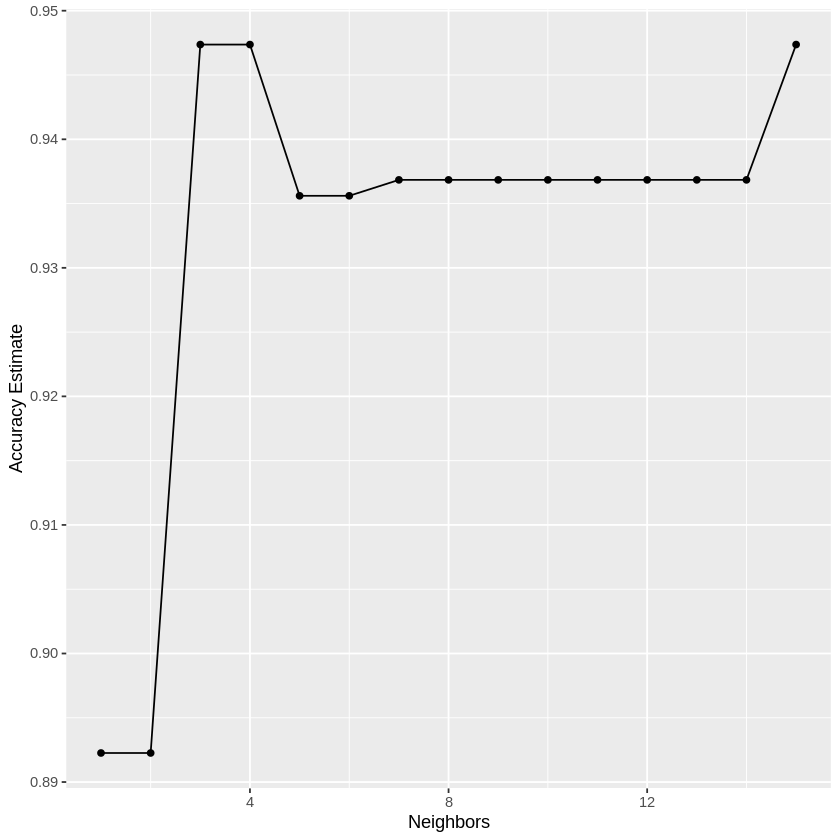

In [98]:
set.seed(1)
knn_results_tune_Sidi_FFMC <- workflow() %>%
  add_recipe(Sidi_FFMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_Sidi_FFMC <- knn_results_tune_Sidi_FFMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Sidi_FFMC <- ggplot(accuracies_Sidi_FFMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()

accuracy_vs_k_Sidi_FFMC

Using the optimal K value calculate the accuracy of the classification model for FFMC on the Sidi Bel Abbes test data

In [101]:
set.seed(1)
Sidi_knn_spec_FFMC <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_FFMC_Fit_C <- workflow() %>%
    add_recipe(Sidi_FFMC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_FFMC) %>%
    fit(data=Sidi_Bel_Abbes_train)



Sidi_FFMC_prediction <- predict(Sidi_FFMC_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)


Sidi_FFMC_prediction_accuracy <- Sidi_FFMC_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_FFMC_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,1
kap,binary,1


In [96]:
Sidi_FFMC_Fit_C <- workflow() %>%
    add_recipe(Sidi_FFMC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_FFMC) %>%
    fit_resamples(resamples=Sidi_vfold_C) %>%
    collect_metrics()
Sidi_FFMC_Fit_C

.metric,.estimator,mean,n,std_err
<chr>,<chr>,<dbl>,<int>,<dbl>
accuracy,binary,0.9473684,5,0.02882750
roc_auc,binary,0.9559524,5,0.02889205


Cell below contains the recipe for DMC for the Bejaia dataset 

In [72]:
set.seed(1)
Bej_DMC_recipe_scaled <- recipe(Class ~ DMC + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Finds the optimal K value for DMC on the Bejaia dataset

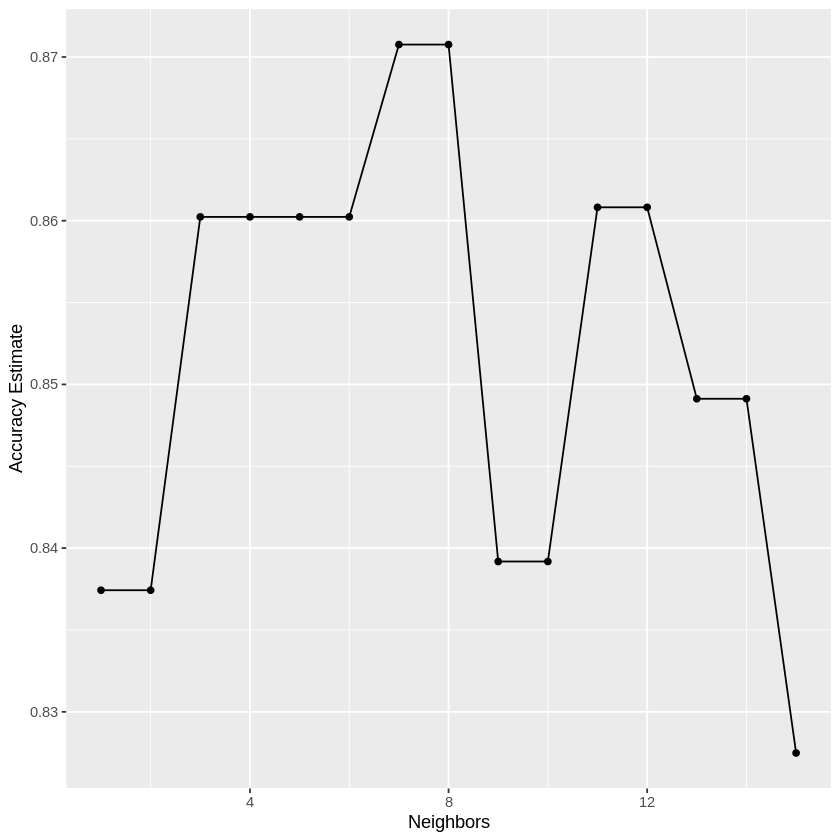

In [73]:
knn_results_tune_Bej_DMC <- workflow() %>%
  add_recipe(Bej_DMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_DMC <- knn_results_tune_Bej_DMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Bej_DMC <- ggplot(accuracies_bej_DMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_Bej_DMC

Using the optimal K value the accuracy is measured for DMC on the Bejaia test data

In [74]:
Bej_knn_spec_DMC <- nearest_neighbor(weight_func="rectangular", neighbors=7) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_DMC_Fit_C <- workflow() %>%
    add_recipe(Bej_FFMC_recipe_scaled) %>%
    add_model(Bej_knn_spec_DMC) %>%
    fit(data=Bejaia_train)


Bej_DMC_prediction <- predict(Bej_DMC_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_DMC_prediction_accuracy <- Bej_DMC_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_FFMC_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9310345
kap,binary,0.8625592


The cell below contains the recipe for DMC on the Sidi Bel Abbes data set

In [75]:
Sidi_DMC_recipe_scaled <- recipe(Classes ~ DMC + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

The cell below find the optimal k to use for DMC on the Sidi Bel Abbes dataset

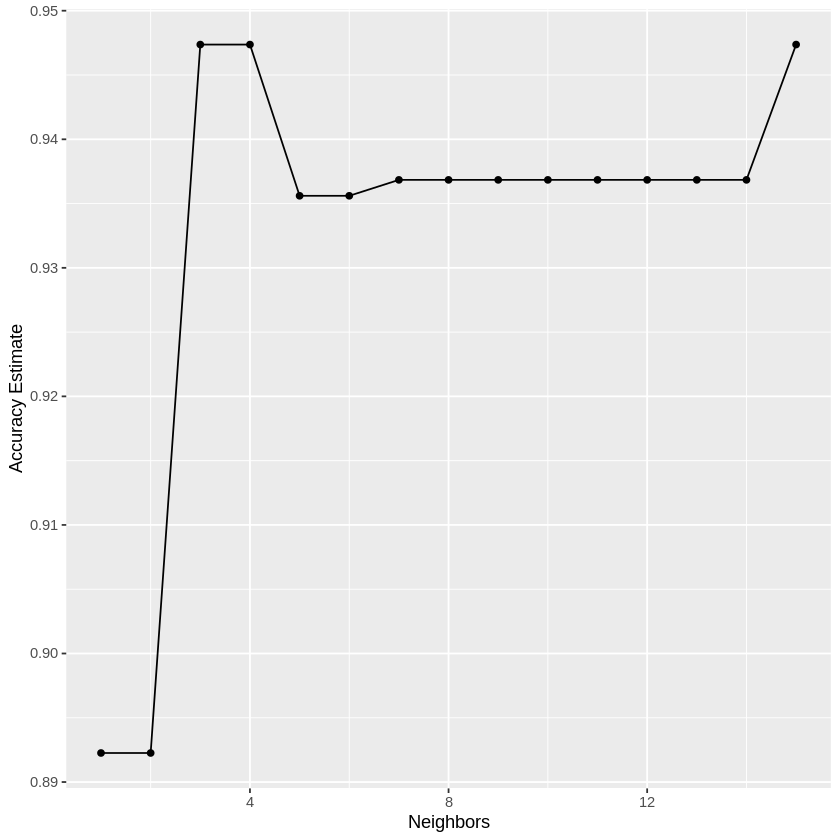

In [76]:
knn_results_tune_Sidi_DMC <- workflow() %>%
  add_recipe(Sidi_DMC_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Sidi_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_Sidi_DMC <- knn_results_tune_Sidi_DMC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Sidi_DMC <- ggplot(accuracies_Sidi_DMC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()

accuracy_vs_k_Sidi_FFMC

Using the optimal K value find the accuracy of DMC on the Sidi Bel Abbes dataset

In [77]:
Sidi_knn_spec_DMC <- nearest_neighbor(weight_func="rectangular", neighbors=4) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_DMC_Fit_C <- workflow() %>%
    add_recipe(Sidi_DMC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_DMC) %>%
    fit(data=Sidi_Bel_Abbes_train)


Sidi_DMC_prediction <- predict(Sidi_DMC_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_DMC_prediction_accuracy <- Sidi_DMC_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_FFMC_prediction_accuracy



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,1
kap,binary,1


EEEERRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR

Bhavana Stuff

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5862069
kap,binary,0.1792453


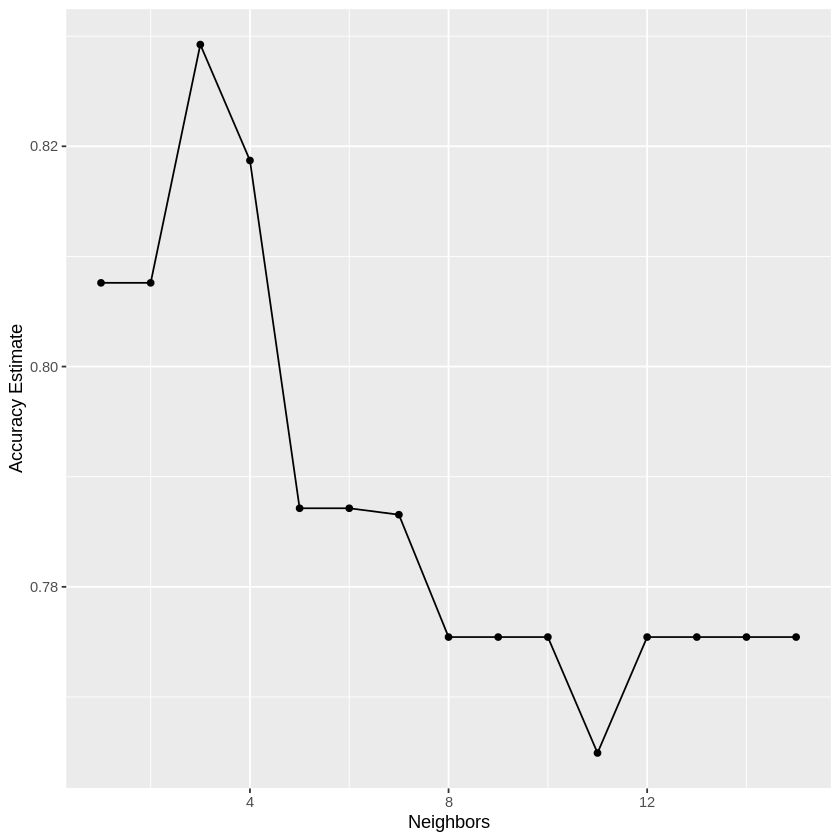

In [78]:
Bej_Rain_recipe_scaled <- recipe(Class ~ Rain + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_rain <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Rain_Fit <- workflow() %>%
    add_recipe(Bej_Rain_recipe_scaled) %>%
    add_model(Bej_knn_spec_rain) %>%
    fit(data=Bejaia_train)

Bej_vfold_Rain_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)

knn_spec_tune_Bej_rain <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals_Bej_rain <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(Bej_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune_Bej_rain) %>%
  tune_grid(resamples =Bej_vfold_Rain_C , grid = k_vals_Bej_rain) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_Rain <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

Bej_Rain_prediction <- predict(Bej_Rain_Fit, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_Rain_prediction_accuracy <- Bej_Rain_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_Rain_prediction_accuracy


EEEEEEEEEEEEEEEERRRRRRRRRRRRRRRRRRRRRRR

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8620690
kap,binary,0.7238095


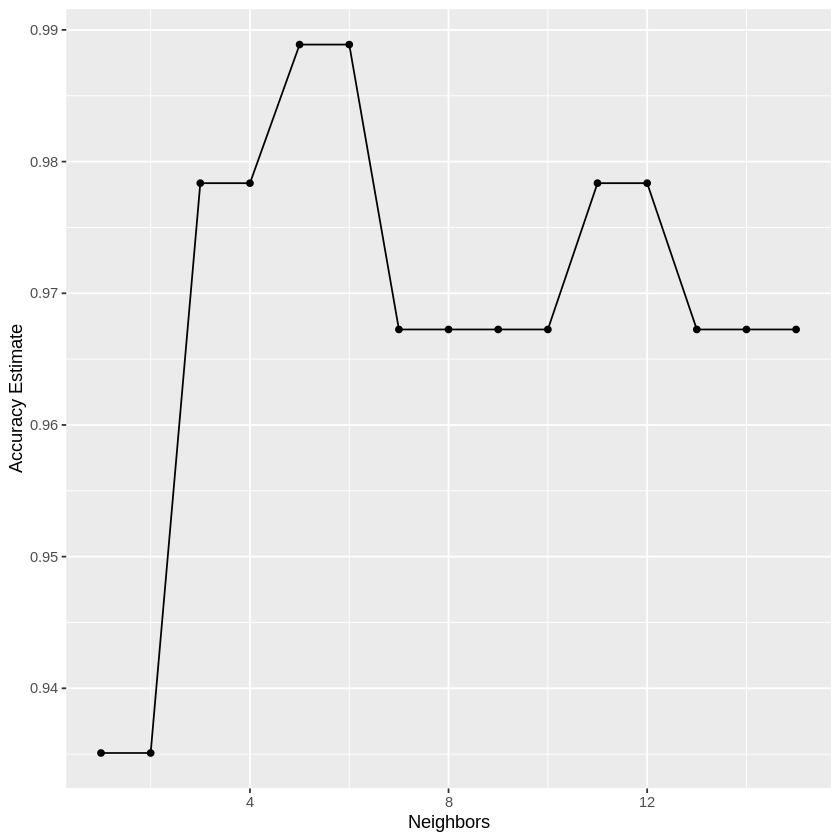

In [79]:
Bej_FWI_recipe_scaled <- recipe(Class ~ FWI + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=3) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_FWI_Fit_C <- workflow() %>%
    add_recipe(Bej_FWI_recipe_scaled) %>%
    add_model(Bej_knn_spec_C) %>%
    fit(data=Bejaia_train)

Bej_vfold_FWI_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(Bej_FWI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_FWI_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_FWI <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_FWI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

Bej_FWI_prediction <- predict(Bej_FWI_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)
Bej_FWI_prediction_accuracy <- Bej_FWI_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_FWI_prediction_accuracy


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8181287,5,0.04820927,Model01
1,roc_auc,binary,0.8166667,5,0.04947253,Model01
2,accuracy,binary,0.8181287,5,0.04820927,Model02
2,roc_auc,binary,0.8623457,5,0.03063371,Model02
3,accuracy,binary,0.8485380,5,0.02184976,Model03
3,roc_auc,binary,0.8774074,5,0.03542995,Model03
4,accuracy,binary,0.8485380,5,0.02184976,Model04
4,roc_auc,binary,0.8834568,5,0.03820105,Model04
5,accuracy,binary,0.8590643,5,0.04077244,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7586207
kap,binary,0.5155131


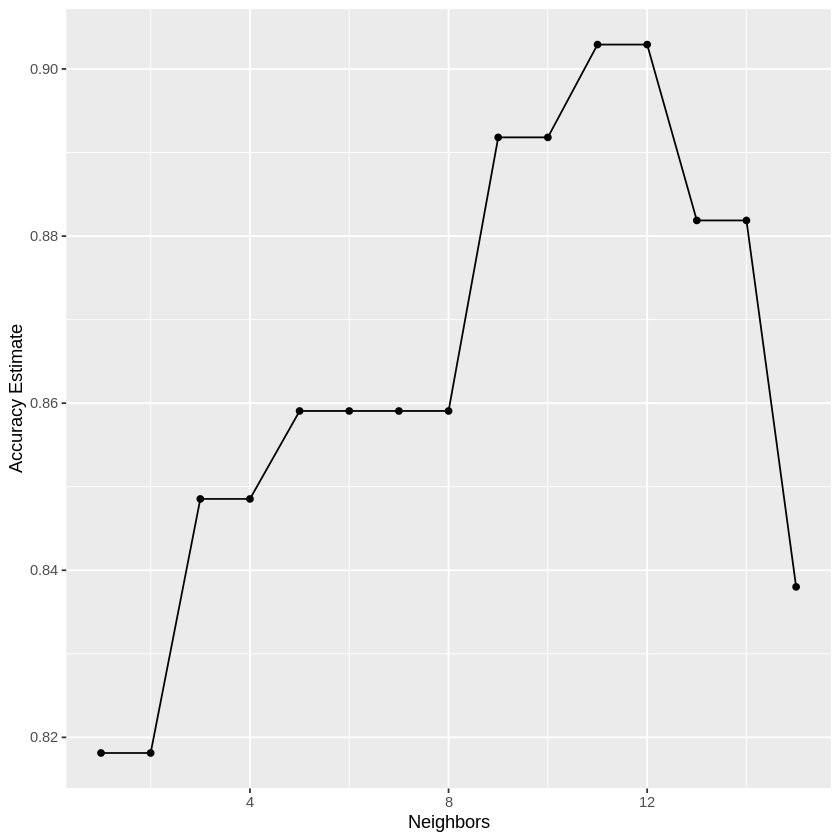

In [80]:
Bej_BUI_recipe_scaled <- recipe(Class ~ BUI + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_BUI_Fit_C <- workflow() %>%
    add_recipe(Bej_BUI_recipe_scaled) %>%
    add_model(Bej_knn_spec_C) %>%
    fit(data=Bejaia_train)

Bej_vfold_BUI_C <- vfold_cv(Bejaia_train, v =5 , strata =Class)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(Bej_BUI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_BUI_C , grid = k_vals) %>%
  collect_metrics()
knn_results_tune

accuracies_bej_BUI <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_BUI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

Bej_BUI_prediction <- predict(Bej_BUI_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)
Bej_BUI_prediction_accuracy <- Bej_BUI_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_BUI_prediction_accuracy


In [81]:
SBA_Rain_recipe_scaled <- recipe(Classes ~ Rain + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

SBA_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SBA_Rain_Fit_C <- workflow() %>%
    add_recipe(SBA_Rain_recipe_scaled) %>%
    add_model(SBA_knn_spec_C) %>%
    fit(data=Sidi_Bel_Abbes_train)

SBA_vfold_Rain_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune_SBA_Rain <- workflow() %>%
  add_recipe(SBA_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =SBA_vfold_Rain_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_SBA_Rain <- knn_results_tune_SBA_Rain %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_SBA_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
#accuracy_vs_k

SBA_Rain_prediction <- predict(SBA_Rain_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)
SBA_Rain_prediction_accuracy <- SBA_Rain_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
SBA_Rain_prediction_accuracy



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8965517
kap,binary,0.7763496


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9009632,5,0.027980132,Model01
1,roc_auc,binary,0.8949134,5,0.031313079,Model01
2,accuracy,binary,0.9009632,5,0.027980132,Model02
2,roc_auc,binary,0.9497835,5,0.014199159,Model02
3,accuracy,binary,0.9455452,5,0.001230241,Model03
3,roc_auc,binary,0.9491883,5,0.009465212,Model03
4,accuracy,binary,0.9455452,5,0.001230241,Model04
4,roc_auc,binary,0.9561328,5,0.013566012,Model04
5,accuracy,binary,0.9344341,5,0.011449270,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8965517
kap,binary,0.7763496


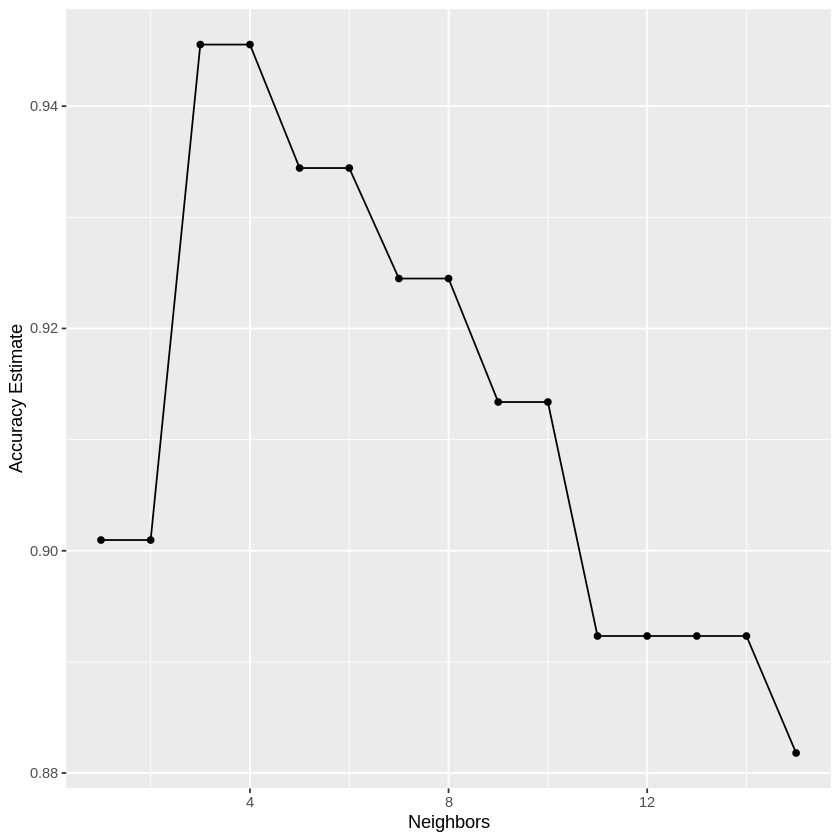

In [82]:
SBA_FWI_recipe_scaled <- recipe(Classes ~ FWI + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

SBA_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SBA_FWI_Fit_C <- workflow() %>%
    add_recipe(SBA_FWI_recipe_scaled) %>%
    add_model(SBA_knn_spec_C) %>%
    fit(data=Sidi_Bel_Abbes_train)

SBA_vfold_FWI_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(SBA_FWI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =SBA_vfold_FWI_C , grid = k_vals) %>%
  collect_metrics()
knn_results_tune

accuracies_SBA_FWI <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_SBA_FWI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

SBA_FWI_prediction <- predict(SBA_FWI_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)
SBA_FWI_prediction_accuracy <- SBA_FWI_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
SBA_FWI_prediction_accuracy


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7382525,5,0.01402210,Model01
1,roc_auc,binary,0.7370130,5,0.01926817,Model01
2,accuracy,binary,0.7382525,5,0.01402210,Model02
2,roc_auc,binary,0.8226551,5,0.03129015,Model02
3,accuracy,binary,0.8150671,5,0.04762550,Model03
3,roc_auc,binary,0.8068182,5,0.02998148,Model03
4,accuracy,binary,0.8150671,5,0.04762550,Model04
4,roc_auc,binary,0.8481602,5,0.02397473,Model04
5,accuracy,binary,0.8577571,5,0.03782680,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7241379
kap,binary,0.3894737


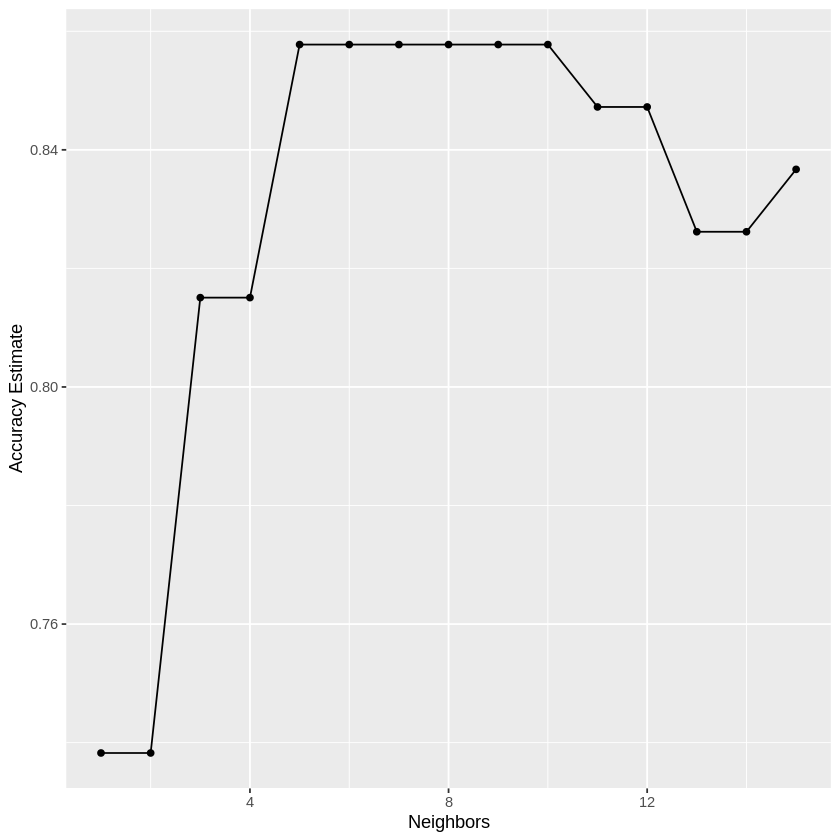

In [83]:
SBA_BUI_recipe_scaled <- recipe(Classes ~ BUI + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

SBA_knn_spec_C <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

SBA_BUI_Fit_C <- workflow() %>%
    add_recipe(SBA_BUI_recipe_scaled) %>%
    add_model(SBA_knn_spec_C) %>%
    fit(data=Sidi_Bel_Abbes_train)

SBA_vfold_BUI_C <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

knn_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

knn_results_tune <- workflow() %>%
  add_recipe(SBA_BUI_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =SBA_vfold_BUI_C , grid = k_vals) %>%
  collect_metrics()
knn_results_tune

accuracies_SBA_BUI <- knn_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_SBA_BUI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

SBA_BUI_prediction <- predict(SBA_BUI_Fit_C, Sidi_Bel_Abbes_test) %>%
    bind_cols(Sidi_Bel_Abbes_test)
SBA_BUI_prediction_accuracy <- SBA_BUI_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
SBA_BUI_prediction_accuracy


Hunters stuff

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9672515,5,0.013380189,Model01
1,roc_auc,binary,0.9677778,5,0.013193713,Model01
2,accuracy,binary,0.9672515,5,0.013380189,Model02
2,roc_auc,binary,0.9864198,5,0.010762713,Model02
3,accuracy,binary,0.9666667,5,0.022222222,Model03
3,roc_auc,binary,0.9851852,5,0.010798059,Model03
4,accuracy,binary,0.9666667,5,0.022222222,Model04
4,roc_auc,binary,0.9839506,5,0.010973080,Model04
5,accuracy,binary,0.9666667,5,0.022222222,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8965517
kap,binary,0.7923628


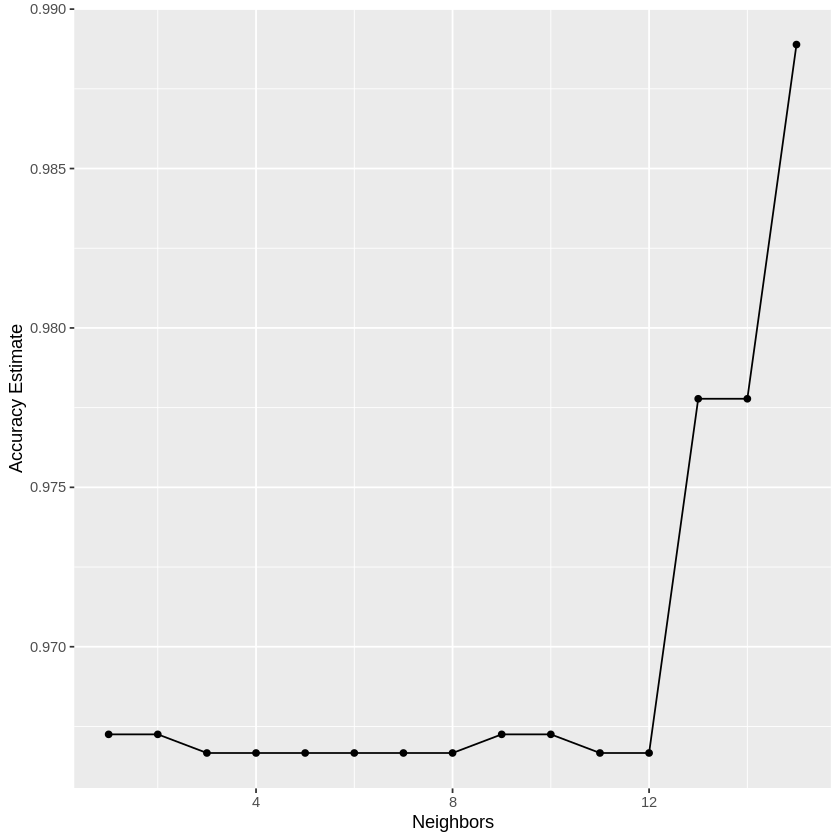

In [84]:
Bej_ISI_recipe_scaled <- recipe(Class ~ ISI + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_ISI <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_ISI_Fit <- workflow() %>%
    add_recipe(Bej_ISI_recipe_scaled) %>%
    add_model(Bej_knn_spec_ISI) %>%
    fit(data=Bejaia_train)

Bej_vfold_ISI <- vfold_cv(Bejaia_train, v =5 , strata =Class)

Bej_knn_spec_tune_ISI<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Bej_k_vals_ISI <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Bej_knn_results_tune_ISI <- workflow() %>%
  add_recipe(Bej_ISI_recipe_scaled) %>%
  add_model(Bej_knn_spec_tune_ISI) %>%
  tune_grid(resamples =Bej_vfold_ISI , grid = Bej_k_vals_ISI) %>%
  collect_metrics()
Bej_knn_results_tune_ISI

accuracies_bej_ISI <- Bej_knn_results_tune_ISI %>%
  filter(.metric == "accuracy")

accuracy_vs_k_ISI <- ggplot(accuracies_bej_ISI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_ISI

Bej_ISI_prediction <- predict(Bej_ISI_Fit, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_ISI_prediction_accuracy <- Bej_ISI_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_ISI_prediction_accuracy



neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9449604,5,0.017605805,Model01
1,roc_auc,binary,0.9432900,5,0.020553797,Model01
2,accuracy,binary,0.9449604,5,0.017605805,Model02
2,roc_auc,binary,0.9692821,5,0.016845477,Model02
3,accuracy,binary,0.9350189,5,0.010135142,Model03
3,roc_auc,binary,0.9692821,5,0.016845477,Model03
4,accuracy,binary,0.9350189,5,0.010135142,Model04
4,roc_auc,binary,0.9936508,5,0.003938380,Model04
5,accuracy,binary,0.9455452,5,0.016688973,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.9655172
kap,binary,0.9254499


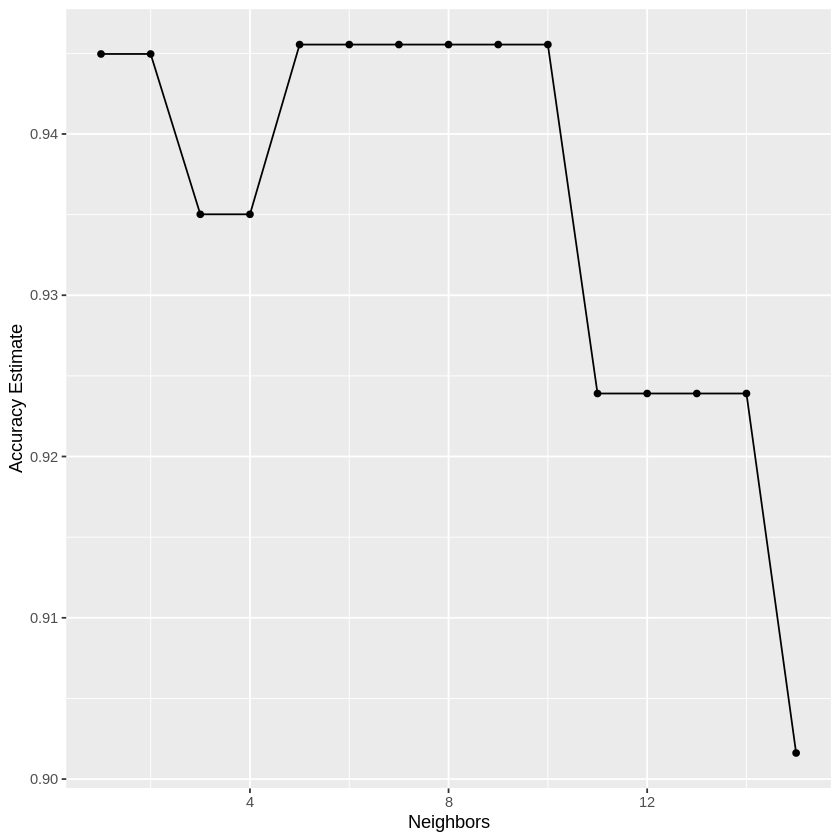

In [85]:
Sidi_ISI_recipe_scaled <- recipe(Classes ~ ISI + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Sidi_knn_spec_ISI <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_ISI_Fit <- workflow() %>%
    add_recipe(Bej_ISI_recipe_scaled) %>%
    add_model(Bej_knn_spec_ISI) %>%
    fit(data=Bejaia_train)


Sidi_vfold_ISI <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

Sidi_knn_spec_tune_ISI<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Sidi_k_vals_ISI <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Sidi_knn_results_tune_ISI <- workflow() %>%
  add_recipe(Sidi_ISI_recipe_scaled) %>%
  add_model(Sidi_knn_spec_tune_ISI) %>%
  tune_grid(resamples =Sidi_vfold_ISI , grid = Sidi_k_vals_ISI) %>%
  collect_metrics()
Sidi_knn_results_tune_ISI

accuracies_Sidi_ISI <- Sidi_knn_results_tune_ISI %>%
  filter(.metric == "accuracy")

Sidi_accuracy_vs_k_ISI <- ggplot(accuracies_Sidi_ISI, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
Sidi_accuracy_vs_k_ISI

Sidi_ISI_prediction <- predict(Sidi_ISI_Fit, Sidi_Bel_Abbes_test ) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_ISI_prediction_accuracy <- Sidi_ISI_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_ISI_prediction_accuracy


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.7853801,5,0.04027877,Model01
1,roc_auc,binary,0.7866667,5,0.03741657,Model01
2,accuracy,binary,0.7853801,5,0.04027877,Model02
2,roc_auc,binary,0.8369136,5,0.05139251,Model02
3,accuracy,binary,0.8491228,5,0.05125390,Model03
3,roc_auc,binary,0.8681481,5,0.04345811,Model03
4,accuracy,binary,0.8491228,5,0.05125390,Model04
4,roc_auc,binary,0.8765432,5,0.04436593,Model04
5,accuracy,binary,0.8274854,5,0.03557171,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6896552
kap,binary,0.3800475


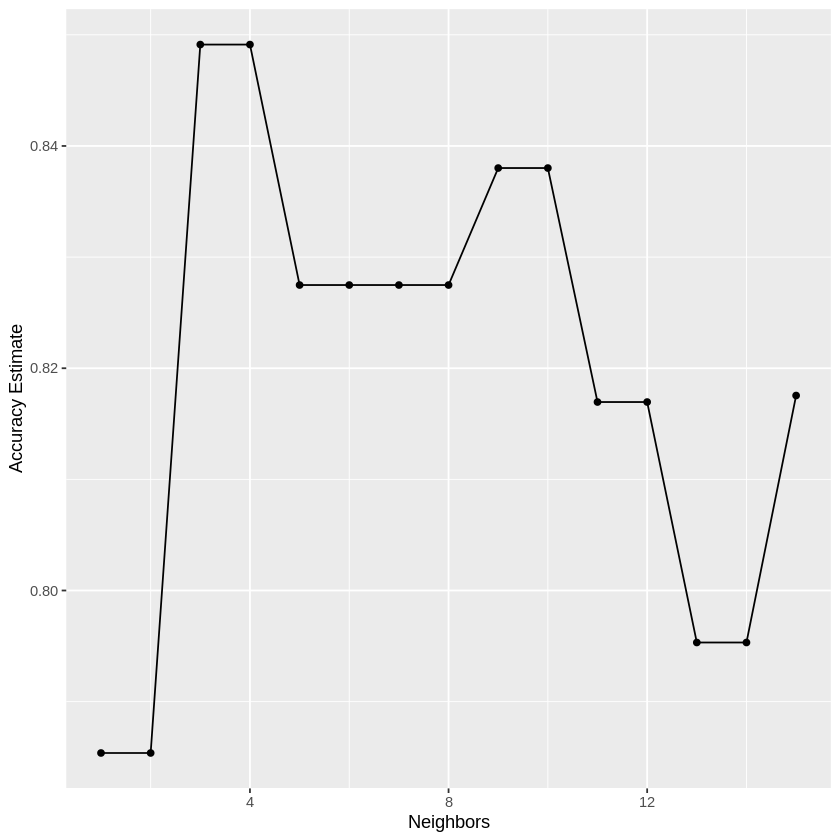

In [86]:
Bej_DC_recipe_scaled <- recipe(Class ~ DC + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Bej_knn_spec_DC <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_DC_Fit <- workflow() %>%
    add_recipe(Bej_DC_recipe_scaled) %>%
    add_model(Bej_knn_spec_DC) %>%
    fit(data=Bejaia_train)

Bej_vfold_DC <- vfold_cv(Bejaia_train, v =5 , strata =Class)

Bej_knn_spec_tune_DC<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Bej_k_vals_DC <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Bej_knn_results_tune_DC <- workflow() %>%
  add_recipe(Bej_DC_recipe_scaled) %>%
  add_model(Bej_knn_spec_tune_DC) %>%
  tune_grid(resamples =Bej_vfold_DC , grid = Bej_k_vals_DC) %>%
  collect_metrics()
Bej_knn_results_tune_DC

accuracies_bej_DC<- Bej_knn_results_tune_DC %>%
  filter(.metric == "accuracy")

accuracy_vs_k_DC <- ggplot(accuracies_bej_DC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_DC

Bej_DC_prediction <- predict(Bej_DC_Fit, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_DC_prediction_accuracy <- Bej_DC_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_DC_prediction_accuracy


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.8496388,5,0.03424814,Model01
1,roc_auc,binary,0.8361472,5,0.04274871,Model01
2,accuracy,binary,0.8496388,5,0.03424814,Model02
2,roc_auc,binary,0.8783189,5,0.05631941,Model02
3,accuracy,binary,0.8583419,5,0.03245016,Model03
3,roc_auc,binary,0.8836219,5,0.05608709,Model03
4,accuracy,binary,0.8583419,5,0.03245016,Model04
4,roc_auc,binary,0.8809885,5,0.05933955,Model04
5,accuracy,binary,0.8706226,5,0.03885077,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8620690
kap,binary,0.6947368


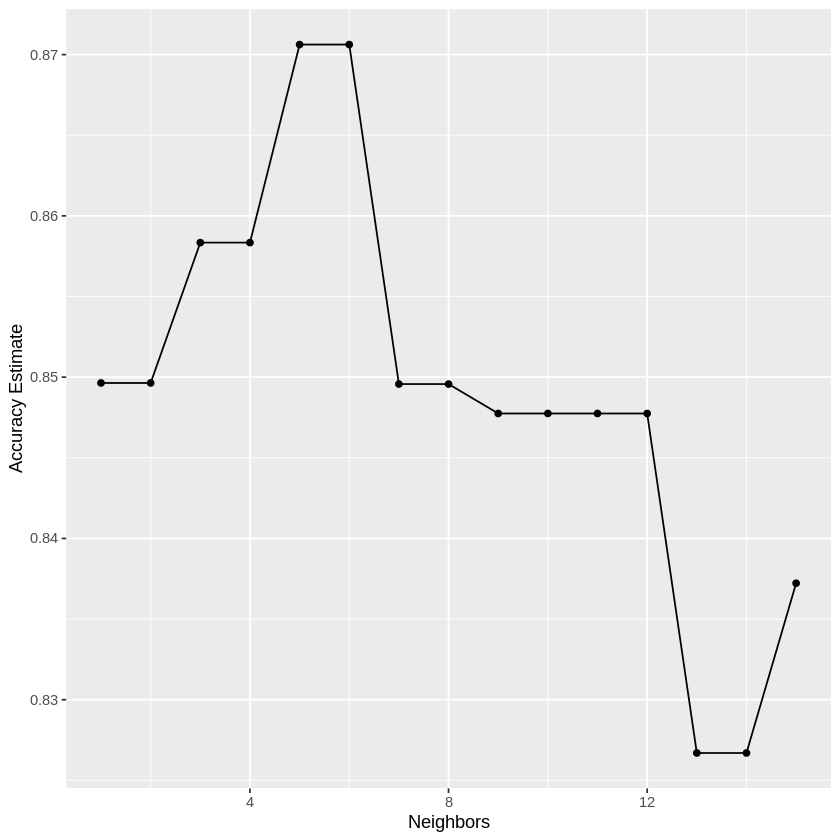

In [87]:
Sidi_DC_recipe_scaled <- recipe(Classes ~ DC + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Sidi_knn_spec_DC <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_DC_Fit <- workflow() %>%
    add_recipe(Sidi_DC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_DC) %>%
    fit(data=Sidi_Bel_Abbes_train)

Sidi_vfold_DC <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

Sidi_knn_spec_tune_DC<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Sidi_k_vals_DC <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Sidi_knn_results_tune_DC <- workflow() %>%
  add_recipe(Sidi_DC_recipe_scaled) %>%
  add_model(Sidi_knn_spec_tune_DC) %>%
  tune_grid(resamples =Sidi_vfold_DC , grid = Sidi_k_vals_DC) %>%
  collect_metrics()
Sidi_knn_results_tune_DC

accuracies_Sidi_DC <- Sidi_knn_results_tune_DC%>%
  filter(.metric == "accuracy")

Sidi_accuracy_vs_k_DC <- ggplot(accuracies_Sidi_DC, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
Sidi_accuracy_vs_k_DC

Sidi_DC_prediction <- predict(Sidi_DC_Fit, Sidi_Bel_Abbes_test ) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_DC_prediction_accuracy <- Sidi_DC_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_DC_prediction_accuracy




Erjun Stuff

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.5862069
kap,binary,0.1830986


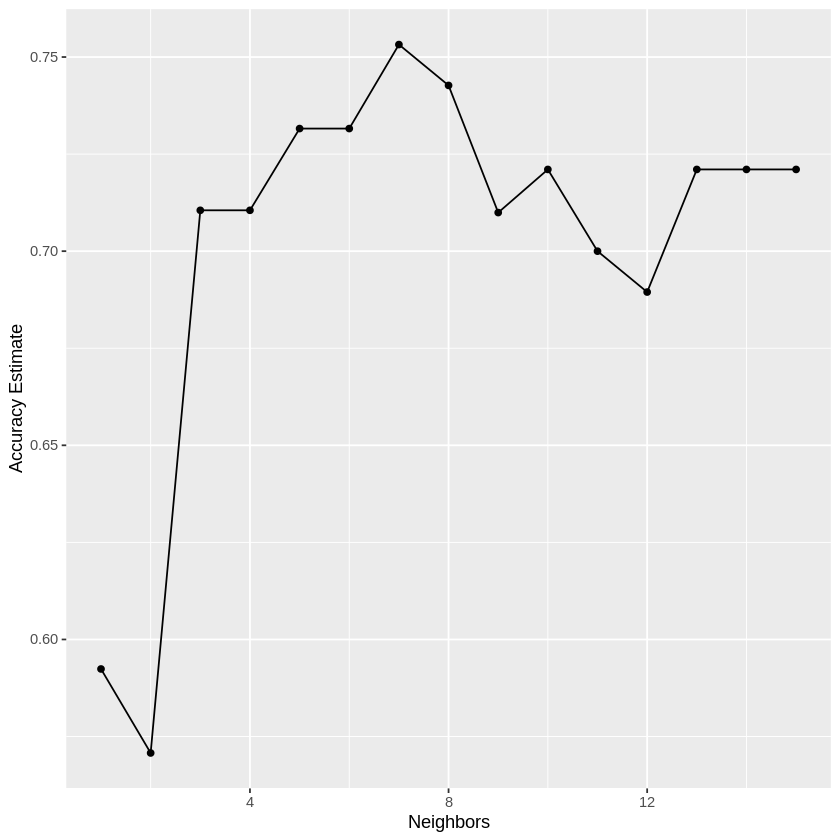

In [88]:
Bej_Tem_recipe_scaled <- recipe(Class ~ Temperature + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

knn_Tem_results_tune <- workflow() %>%
  add_recipe(Bej_Tem_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()

accuracies_bej_Tem <- knn_Tem_results_tune %>%
  filter(.metric == "accuracy")

accuracy_vs_k <- ggplot(accuracies_bej_Tem, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k

Bej_knn_spec_Tem_C <- nearest_neighbor(weight_func="rectangular", neighbors=12) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Tem_Fit_C <- workflow() %>%
    add_recipe(Bej_Tem_recipe_scaled) %>%
    add_model(Bej_knn_spec_C) %>%
    fit(data=Bejaia_train)

Bej_Tem_prediction <- predict(Bej_Tem_Fit_C, Bejaia_test) %>%
    bind_cols(Bejaia_test)


Bej_Tem_prediction_accuracy <- Bej_Tem_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_Tem_prediction_accuracy




neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6837977,5,0.03648146,Model01
1,roc_auc,binary,0.6508658,5,0.03127191,Model01
2,accuracy,binary,0.6837977,5,0.03648146,Model02
2,roc_auc,binary,0.6790584,5,0.08128223,Model02
3,accuracy,binary,0.7531476,5,0.07194426,Model03
3,roc_auc,binary,0.7438853,5,0.07080145,Model03
4,accuracy,binary,0.7531476,5,0.07194426,Model04
4,roc_auc,binary,0.7800144,5,0.06815931,Model04
5,accuracy,binary,0.7307878,5,0.06472997,Model05


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8620690
kap,binary,0.6947368


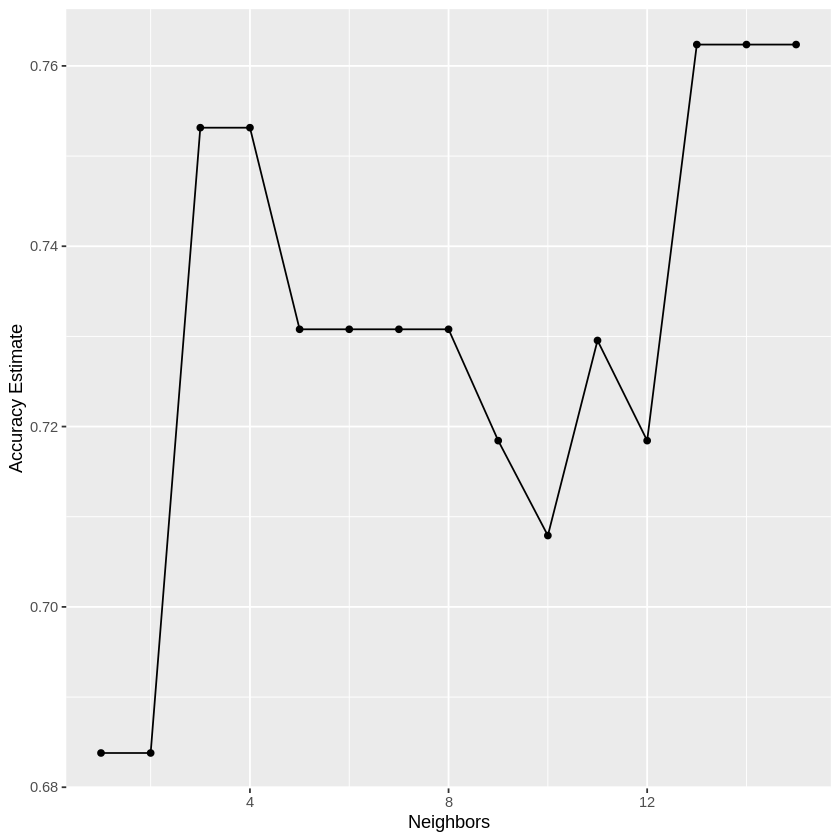

In [89]:
Sidi_Temp_recipe_scaled <- recipe(Classes ~ Temperature + RH, data=Sidi_Bel_Abbes_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

Sidi_knn_spec_Temp <- nearest_neighbor(weight_func="rectangular", neighbors=5) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Sidi_Temp_Fit <- workflow() %>%
    add_recipe(Sidi_DC_recipe_scaled) %>%
    add_model(Sidi_knn_spec_DC) %>%
    fit(data=Sidi_Bel_Abbes_train)

Sidi_vfold_Temp <- vfold_cv(Sidi_Bel_Abbes_train, v =5 , strata =Classes)

Sidi_knn_spec_tune_Temp<- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

Sidi_k_vals_Temp <- tibble(neighbors = seq(from = 1, to = 15, by = 1))

Sidi_knn_results_tune_Temp <- workflow() %>%
  add_recipe(Sidi_Temp_recipe_scaled) %>%
  add_model(Sidi_knn_spec_tune_Temp) %>%
  tune_grid(resamples =Sidi_vfold_Temp , grid = Sidi_k_vals_Temp) %>%
  collect_metrics()
Sidi_knn_results_tune_Temp

accuracies_Sidi_Temp <- Sidi_knn_results_tune_Temp %>%
  filter(.metric == "accuracy")

Sidi_accuracy_vs_k_Temp <- ggplot(accuracies_Sidi_Temp, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
Sidi_accuracy_vs_k_Temp

Sidi_Temp_prediction <- predict(Sidi_Temp_Fit, Sidi_Bel_Abbes_test ) %>%
    bind_cols(Sidi_Bel_Abbes_test)

Sidi_Temp_prediction_accuracy <- Sidi_Temp_prediction %>%
    metrics(truth=Classes, estimate= .pred_class)
Sidi_Temp_prediction_accuracy

In [90]:
Bej_Rain_recipe_scaled <- recipe(Class ~ Rain + RH, data=Bejaia_train) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())

set.seed(1)

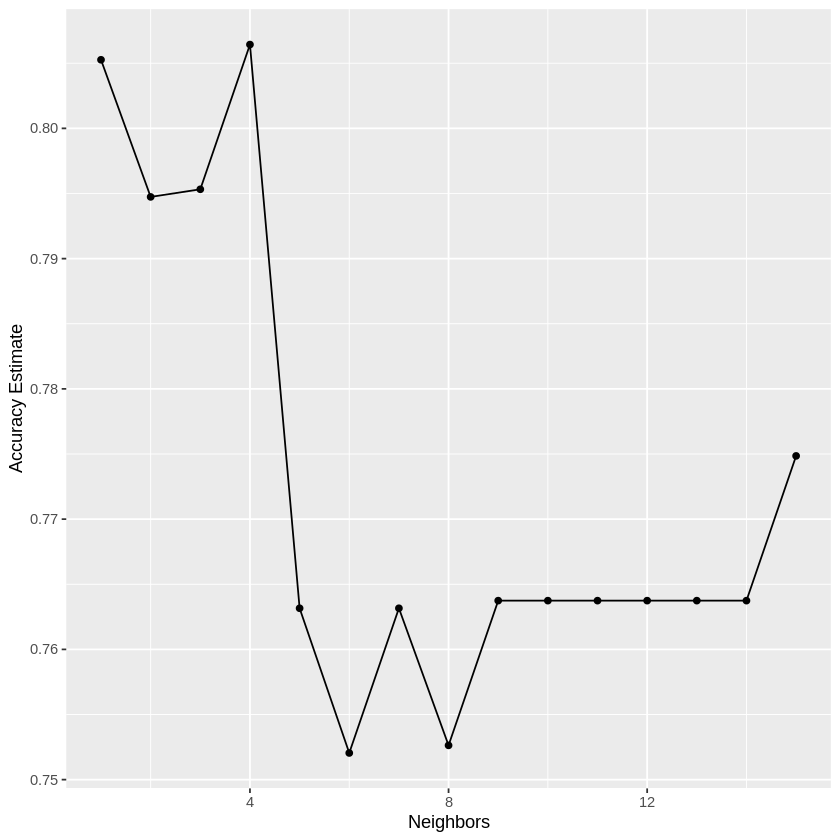

In [91]:
knn_results_tune_Bej_Rain <- workflow() %>%
  add_recipe(Bej_Rain_recipe_scaled) %>%
  add_model(knn_spec_tune) %>%
  tune_grid(resamples =Bej_vfold_C , grid = k_vals) %>%
  collect_metrics()
#knn_results_tune

accuracies_bej_Rain <- knn_results_tune_Bej_Rain %>%
  filter(.metric == "accuracy")

accuracy_vs_k_Bej_Rain <- ggplot(accuracies_bej_Rain, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate")+
  scale_x_continuous()
accuracy_vs_k_Bej_Rain


In [92]:

Bej_knn_spec_Rain <- nearest_neighbor(weight_func="rectangular", neighbors=4) %>%
    set_engine("kknn") %>%
    set_mode("classification")

Bej_Rain_Fit_ <- workflow() %>%
    add_recipe(Bej_Rain_recipe_scaled) %>%
    add_model(Bej_knn_spec_Rain) %>%
    fit(data=Bejaia_train)


Bej_Rain_prediction <- predict(Bej_Rain_Fit_, Bejaia_test) %>%
    bind_cols(Bejaia_test)

Bej_Rain_prediction_accuracy <- Bej_Rain_prediction %>%
    metrics(truth=Class, estimate= .pred_class)
Bej_Rain_prediction_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6206897
kap,binary,0.2494118


Expected outcomes and significance:

 In this study we expect to discover a relationship between the most contributing atmospheric condition(s) of the area to the presence of fire. If we can determine a reliable relationship we can attempt to predict areas with a high likelihood of fire. This information can alos allow proper allocation of fire fighting resources to vulnerable areas. We hope our findings can lead to a better understanding of how and why fires occur in forests and how the changing global climate will affect the location and frequency of forest fires.
    